# Selection of two Meta-Heuristics which solve the Travelling Salesman Problem

The Travelling Salesman Problem (TSP) is a well-studied optimization problem that has been proved to be non-deterministic NP hard problem (Mersiovsky et al., 2018). The TSP problem involves a travelling salesperson wanting to visit exactly one city in a list of cities and afterwards return to first city at the lowest cost. Metaheuristics algorithms such as Ant Colony Optimisation (ACO) and greedy randomized adaptive search procedure (GRASP) can provide an optimized way to solve this problem. 

Metaheuristic algorithms provide an optimized way of solving complex problems, such as the travelling salesman problem. Compared to other algorithms such as optimization algorithms and iterative methods, metaheuristics cannot guarantee a global optimal solution for some class problems (Wikipedia, n.d.).


# The Graph

In [1]:
import random
from pprint import pprint
from itertools import permutations
from math import inf as oo # Infinity (∞) is larger than any number
from math import sqrt
from time      import time
import matplotlib.pyplot as plt
import copy

MAX_DISTANCE = 100 # Set maximum nodes for graph

def random_symmetric_graph(n,seed):
    ''' Symmetric adjacency matrix of size nxn '''
    dist_matrix = [[oo for _ in range(n)] for _ in range(n)]
    random.seed(seed)
    for i in range(n):
        for j in range(i+1,n):
            v = random.randint(1,MAX_DISTANCE)
            dist_matrix[i][j] = v
            dist_matrix[j][i] = v
    return dist_matrix

def random_euclidean_graph(n):
    ''' Symmetric adjacency matrix of a Euclidean graph of size nxn '''
    dist_matrix = [[oo for _ in range(n)] for _ in range(n)]
    points = []
    for p in range(n):
        x,y = randint(0,MAX_DISTANCE), randint(0,MAX_DISTANCE)
        points.append((x,y))
    for i in range(n):
        p1 = points[i]
        for j in range(i+1,n):
            p2 = points[j]
            distance = sqrt((p1[0]-p2[0])**2+(p1[1]-p2[1])**2)
            dist_matrix[i][j] = distance
            dist_matrix[j][i] = distance
    return dist_matrix

def show(G):
    ''' Show adjacency matrix. Useful for debugging. '''
    n = len(G)
    r = "     "
    for i in range(n):
        r += f'{i:4}'
    r += '\n    -'+'-'*(4*n)+'\n'
    for i in range(n):
        r += f'{i:2} | '
        for j in range(n):
            r += f'{G[i][j]:4}'
        r += '\n'
    r = r.replace('inf', '  ∞')
    print(r)

def cost(G, cycle):
    ''' Calculate the cost of the given cycle '''
    c = 0
    n = len(G)
    for i in range(n):
        a = cycle[i]
        b = cycle[(i+1)%n]
        c += G[a][b]
    return c

# Code used from https://github.coventry.ac.uk/380CT-1920JANMAY/TSP-Guidance/blob/master/Investigating%20TSP.ipynb

# Example: Generating Graph

In [2]:
nsize = 3
seed = 1
G = random_symmetric_graph(nsize,seed)
show(G)

        0   1   2
    -------------
 0 |    ∞  18  73
 1 |   18   ∞  98
 2 |   73  98   ∞



# Greedy Randomized Adaptive Search Procedure (GRASP)

Pseudocode:

**Initialization**
<br>
Obj(BestSoln) = 0
<br>
**For** For i = 1 to $n_{i}$ **do**
<br>
$\quad$ H(Soln) //generate initial solution
<br>
$\quad$ LS(Soln)            //apply local search
<br>
$\quad$ **If** Obj(Soln) > Obj(BestSoln) **then**
<br>
$\quad$$\quad$BestSoln = Soln    //update the best solution
<br>
$\quad$**End if**
<br>
**End for**
<br>
<br>
(Hamdi, 2014)



**Complexity**: 0($2^{n}$)

GRASP is a meta-heuristic algorithm to solve combinatorial optimization problems, introduced by Feo and Resende (Anh Tu, Tuan Dat, Quang Dung, 2018). It is also recognized as a single solution-based metaheuristic which improves a single solution. This can be considered as a “walk” through neighborhoods through the search space of the problem at hand, in this case TSP problem (Talbi, 2009).

During the construction phase a set of candidate solutions are generated from a current solution. The set of candidates are generated by a local search. Then comes the replacement phase which focuses on selecting a candidate solution from the set of candidates and replaces the current solution. The replacement phase is iterated multiple times until a certain criterion is achieved (Ribeiro, Resende, 199). 

The neighborhood is a key part of designing a solution-based algorithm. The structure of the neighborhood can have an effect on the performance of the algorithm being implemented. If the neighborhood structure is not adequate to the problem, any solution-based metaheuristic will fail to solve the problem (Talbi, 2009). 

The greedy local search of the GRASP meta-heuristic must be randomized in order to produce various solutions to the TSP problem. If the algorithm was not randomized, then the local search produced can only be used once to produce a solution. 

In [3]:
def GreedySolution(G):
    """Random path generation algorithm"""
    H = copy.deepcopy(G) # We need the original G. We work on/modify H
    n = len(H)
    cities = list(range(n))
    cycle = [] # solution to be built
    city = 0 # Start city
    while len(cities)>0:
        # Find nearest neighbour
        city_neighbours = H[city]
        if city_neighbours[1:] == city_neighbours[:-1]:
            random_distance = oo
        else:
            random_distance = random.choice([i for i in city_neighbours if i != oo])
        next_city = city_neighbours.index(random_distance)
        # Update 'cycle' and 'cities' and H then 'city'
        cycle.append(city)
        cities.remove(city)
        for i in range(n): # 'city' is not to be used again!
            H[city][i] = oo
            H[i][city] = oo
        city = next_city
    return (cycle)

def cost_change(cost_mat, n1, n2, n3, n4):
    """Calculate lowest cost"""
    return cost_mat[n1][n3] + cost_mat[n2][n4] - cost_mat[n1][n2] - cost_mat[n3][n4]

def two_opt(cost_mat, route):
    """Optimization algorithm, swap local options for nearest distance"""
    best = route
    improved = True
    while improved:
        improved = False
        for i in range(1, len(route) - 2):
            for j in range(i + 1, len(route)):
                if j - i == 1: continue
                if cost_change(cost_mat, best[i - 1], best[i], best[j - 1], best[j]) < 0:
                    best[i:j] = best[j - 1:i - 1:-1]
                    improved = True
        route = best
    return best

def grasp(Max_Iterations, G):
    """Generator and Optimizer functions combined to repeatedly """
    CurrentBest = GreedySolution(G)
    for count in range(Max_Iterations):
        Solution = GreedySolution(G)
        NewSolution = two_opt(G,Solution)
        cost(G, CurrentBest)
        if cost(G, NewSolution) < cost(G, CurrentBest):
            CurrentBest = NewSolution
            print(CurrentBest, cost(G, CurrentBest))
    return CurrentBest

# code used from: 
# https://github.coventry.ac.uk/380CT-1920JANMAY/TSP-Guidance/blob/master/Investigating%20TSP.ipynb
# https://stackoverflow.com/questions/53275314/2-opt-algorithm-to-solve-the-travelling-salesman-problem-in-python

In [4]:
pnts_grasp_n = []
pnts_grasp_t = []

n = 3
s = 1
t0 = t1 = 0

while t1-t0<1:
    G = random_symmetric_graph(n,s)
    t0 = time()
    grasp(1000, G)
    t1 = time ()
    # record time
    print("node, time: " + f"{n}\t{t1-t0}" )
    pnts_grasp_n.append( n )
    pnts_grasp_t.append( t1-t0)
    n += 1

node, time: 3	0.05948185920715332
node, time: 4	0.09611272811889648
[0, 4, 3, 1, 2] 192
node, time: 5	0.17400026321411133
[0, 1, 2, 5, 3, 4] 132
node, time: 6	0.19126176834106445
[0, 4, 3, 2, 5, 1, 6] 236
[0, 6, 3, 4, 2, 5, 1] 195
node, time: 7	0.23190879821777344
[0, 1, 3, 7, 5, 2, 6, 4] 228
[0, 4, 5, 2, 3, 7, 1, 6] 209
[0, 4, 6, 1, 7, 3, 2, 5] 194
node, time: 8	0.3297994136810303
[0, 6, 5, 8, 4, 3, 2, 1, 7] 205
[0, 6, 5, 8, 7, 1, 2, 3, 4] 111
node, time: 9	0.35614514350891113
[0, 4, 7, 2, 9, 6, 5, 1, 8, 3] 221
[0, 6, 5, 4, 7, 2, 9, 3, 8, 1] 162
[0, 1, 8, 3, 2, 7, 9, 6, 5, 4] 141
node, time: 10	0.5193588733673096
[0, 4, 6, 10, 2, 8, 3, 9, 5, 7, 1] 168
[0, 4, 9, 8, 3, 7, 1, 5, 2, 10, 6] 167
[0, 1, 7, 3, 8, 9, 5, 2, 10, 6, 4] 159
node, time: 11	0.5634181499481201
[0, 1, 6, 2, 10, 11, 7, 8, 9, 3, 5, 4] 228
[0, 1, 6, 2, 10, 11, 5, 3, 9, 7, 8, 4] 192
[0, 1, 6, 3, 2, 10, 11, 5, 9, 7, 8, 4] 187
[0, 6, 1, 7, 8, 9, 3, 2, 10, 11, 5, 4] 186
node, time: 12	0.8639013767242432
[0, 4, 6, 10, 7, 9, 1

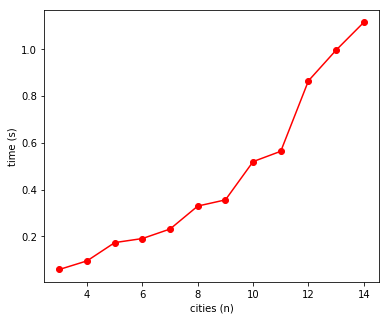

In [5]:
# Determine size of the graph
plt.rcParams["figure.figsize"] = (6,5)
# Plot data
plt.plot(pnts_grasp_n, pnts_grasp_t, 'ro-')
# Label x and y axis
plt.ylabel('time (s)')
plt.xlabel('cities (n)')
# show graph
plt.show()

The graph is testing for time against cities

# Discussion:
As you can see the GRASP search shows a running time of 0(n^2) which shows it grows in polynomial time

# Ant Colony

Our second Meta-Heuristic Algorithm that we will be implementing for the Travelling Salesman Problem (TSP) is Ant Colony Optimisation (ACO). This algorithm was "proposed by Marco Dorigo in 1991 based on the behaviour of biological ants."(Akhtar, 2019). The way the Ant Colony Optimisation (ACO) algorithm works is becuase this is a swarm intelligence based meta-heuristic. "Because the ants drop pheromones every time they bring food, shorter paths are more likely to be stronger optimizing the 'solution'.(Macura, W, n.d.). The Ant Colony Optimisation (ACO) can be applied to the Travelling Salesman Problem (TSP) in order to find the shortest path of cities in the shortest time, by applying the ACO to this it means "Once all the ants have completed their tour, the pheromone on the edges is updated. Each of the pheromone values is initially decreased by a certain percentage. Each edge then recieves an amount of additional pheromone proportional to the quality of the solutions to which it belongs (there is one solution per ant)".(Dorigo, 2007).

**Pseudocode: Ant Colony Optimisation (ACO)**

Input: An instance of P of a combinational problem P
<br>

InitializePheromoneValues(T)
<br>

**while** termination condition not met **do**
<br>
$\quad$   Siter ← ∅
<br>
$\quad$   **for** j = 1,...n **do**
<br>
$\quad$      s ← ConstructSolution(T)      
$\quad$      s ← LocalSearch(s)      
$\quad$      Siter ← Siter ∪ {s}    
$\quad$   **end for**   
$\quad$   ApplyPheromoneUpdate(T)   
**end while**
<br>
<br>

Output: The best Solution Found

(Blum, 2011)

**Big O Complexity:**

The Big O Complexity for time complexity as shown in the Pseudocode is O($n^{2}$) this is becuase of the nested loop for loop within the while loop. The Ant Colony Optimisation has a space complexity of O(n) which is linear.
 

In [6]:
import random as rn
import numpy as np
from numpy.random import choice as np_choice

class AntColony(object):

    def __init__(self, distances, n_ants, n_best, n_iterations, decay, alpha=1, beta=1):
        """
        Args:
            distances (2D numpy.array): Square matrix of distances. Diagonal is assumed to be np.inf.
            n_ants (int): Number of ants running per iteration
            n_best (int): Number of best ants who deposit pheromone
            n_iteration (int): Number of iterations
            decay (float): Rate it which pheromone decays. The pheromone value is multiplied by decay, so 0.95 will lead to decay, 0.5 to much faster decay.
            alpha (int or float): exponenet on pheromone, higher alpha gives pheromone more weight. Default=1
            beta (int or float): exponent on distance, higher beta give distance more weight. Default=1

        Example:
            ant_colony = AntColony(german_distances, 100, 20, 2000, 0.95, alpha=1, beta=2)          
        """
        self.distances  = distances
        self.pheromone = np.ones(self.distances.shape) / len(distances)
        self.all_inds = range(len(distances))
        self.n_ants = n_ants
        self.n_best = n_best
        self.n_iterations = n_iterations
        self.decay = decay
        self.alpha = alpha
        self.beta = beta

    def run(self):
        shortest_path = None
        all_time_shortest_path = ("placeholder", np.inf)
        for i in range(self.n_iterations):
            all_paths = self.gen_all_paths()
            self.spread_pheronome(all_paths, self.n_best, shortest_path=shortest_path)
            shortest_path = min(all_paths, key=lambda x: x[1])
            print (shortest_path)
            if shortest_path[1] < all_time_shortest_path[1]:
                all_time_shortest_path = shortest_path            
            self.pheromone * self.decay            
        return all_time_shortest_path

    def spread_pheronome(self, all_paths, n_best, shortest_path):
        sorted_paths = sorted(all_paths, key=lambda x: x[1])
        for path, dist in sorted_paths[:n_best]:
            for move in path:
                self.pheromone[move] += 1.0 / self.distances[move]

    def gen_path_dist(self, path):
        total_dist = 0
        for ele in path:
            total_dist += self.distances[ele]
        return total_dist

    def gen_all_paths(self):
        all_paths = []
        for i in range(self.n_ants):
            path = self.gen_path(0)
            all_paths.append((path, self.gen_path_dist(path)))
        return all_paths

    def gen_path(self, start):
        path = []
        visited = set()
        visited.add(start)
        prev = start
        for i in range(len(self.distances) - 1):
            move = self.pick_move(self.pheromone[prev], self.distances[prev], visited)
            path.append((prev, move))
            prev = move
            visited.add(move)
        path.append((prev, start)) # going back to where we started    
        return path

    def pick_move(self, pheromone, dist, visited):
        pheromone = np.copy(pheromone)
        pheromone[list(visited)] = 0

        row = pheromone ** self.alpha * (( 1.0 / dist) ** self.beta)

        norm_row = row / row.sum()
        move = np_choice(self.all_inds, 1, p=norm_row)[0]
        return move

# Code used from:
# https://github.com/Akavall/AntColonyOptimization

In [7]:
pnts_ant_n = []
pnts_ant_t = []

n = 3
s = 1
t0 = t1 = 0

while t1-t0<1:
    G = random_symmetric_graph(n,s)
    ant_colony = AntColony(np.array(G), 2, 2, 100, 0.95, alpha=1, beta=1)
    t0 = time()
    shortest_path = ant_colony.run()
    t1 = time ()
    # record time
    print("node, time: " + f"{n}\t{t1-t0}" )
    pnts_ant_n.append( n )
    pnts_ant_t.append( t1-t0)
    n += 1

([(0, 1), (1, 2), (2, 0)], 189.0)
([(0, 1), (1, 2), (2, 0)], 189.0)
([(0, 1), (1, 2), (2, 0)], 189.0)
([(0, 1), (1, 2), (2, 0)], 189.0)
([(0, 1), (1, 2), (2, 0)], 189.0)
([(0, 2), (2, 1), (1, 0)], 189.0)
([(0, 1), (1, 2), (2, 0)], 189.0)
([(0, 1), (1, 2), (2, 0)], 189.0)
([(0, 1), (1, 2), (2, 0)], 189.0)
([(0, 1), (1, 2), (2, 0)], 189.0)
([(0, 1), (1, 2), (2, 0)], 189.0)
([(0, 1), (1, 2), (2, 0)], 189.0)
([(0, 1), (1, 2), (2, 0)], 189.0)
([(0, 1), (1, 2), (2, 0)], 189.0)
([(0, 1), (1, 2), (2, 0)], 189.0)
([(0, 1), (1, 2), (2, 0)], 189.0)
([(0, 1), (1, 2), (2, 0)], 189.0)
([(0, 1), (1, 2), (2, 0)], 189.0)
([(0, 1), (1, 2), (2, 0)], 189.0)
([(0, 1), (1, 2), (2, 0)], 189.0)
([(0, 1), (1, 2), (2, 0)], 189.0)
([(0, 1), (1, 2), (2, 0)], 189.0)
([(0, 1), (1, 2), (2, 0)], 189.0)
([(0, 1), (1, 2), (2, 0)], 189.0)
([(0, 1), (1, 2), (2, 0)], 189.0)
([(0, 1), (1, 2), (2, 0)], 189.0)
([(0, 1), (1, 2), (2, 0)], 189.0)
([(0, 1), (1, 2), (2, 0)], 189.0)
([(0, 1), (1, 2), (2, 0)], 189.0)
([(0, 1), (1, 

([(0, 4), (4, 3), (3, 6), (6, 2), (2, 5), (5, 1), (1, 0)], 224.0)
([(0, 4), (4, 3), (3, 5), (5, 2), (2, 1), (1, 6), (6, 0)], 240.0)
([(0, 4), (4, 3), (3, 2), (2, 5), (5, 1), (1, 6), (6, 0)], 236.0)
([(0, 4), (4, 3), (3, 2), (2, 5), (5, 1), (1, 6), (6, 0)], 236.0)
([(0, 4), (4, 3), (3, 2), (2, 5), (5, 1), (1, 6), (6, 0)], 236.0)
([(0, 4), (4, 3), (3, 2), (2, 5), (5, 1), (1, 6), (6, 0)], 236.0)
([(0, 4), (4, 3), (3, 2), (2, 5), (5, 1), (1, 6), (6, 0)], 236.0)
([(0, 4), (4, 3), (3, 6), (6, 2), (2, 5), (5, 1), (1, 0)], 224.0)
([(0, 4), (4, 3), (3, 5), (5, 2), (2, 6), (6, 1), (1, 0)], 241.0)
([(0, 4), (4, 3), (3, 6), (6, 2), (2, 5), (5, 1), (1, 0)], 224.0)
([(0, 4), (4, 3), (3, 6), (6, 1), (1, 2), (2, 5), (5, 0)], 263.0)
([(0, 4), (4, 3), (3, 5), (5, 2), (2, 1), (1, 6), (6, 0)], 240.0)
([(0, 4), (4, 3), (3, 5), (5, 2), (2, 6), (6, 1), (1, 0)], 241.0)
([(0, 4), (4, 3), (3, 5), (5, 2), (2, 6), (6, 1), (1, 0)], 241.0)
([(0, 4), (4, 3), (3, 6), (6, 2), (2, 5), (5, 1), (1, 0)], 224.0)
([(0, 4), 

([(0, 4), (4, 5), (5, 6), (6, 9), (9, 7), (7, 2), (2, 1), (1, 8), (8, 3), (3, 0)], 226.0)
([(0, 4), (4, 5), (5, 6), (6, 9), (9, 3), (3, 8), (8, 1), (1, 2), (2, 7), (7, 0)], 204.0)
([(0, 4), (4, 5), (5, 6), (6, 9), (9, 7), (7, 2), (2, 3), (3, 8), (8, 1), (1, 0)], 141.0)
([(0, 4), (4, 7), (7, 2), (2, 3), (3, 8), (8, 1), (1, 5), (5, 6), (6, 9), (9, 0)], 179.0)
([(0, 4), (4, 7), (7, 2), (2, 3), (3, 8), (8, 1), (1, 5), (5, 6), (6, 9), (9, 0)], 179.0)
([(0, 4), (4, 5), (5, 6), (6, 9), (9, 7), (7, 2), (2, 3), (3, 8), (8, 1), (1, 0)], 141.0)
([(0, 4), (4, 5), (5, 6), (6, 9), (9, 7), (7, 2), (2, 3), (3, 8), (8, 1), (1, 0)], 141.0)
([(0, 4), (4, 5), (5, 6), (6, 9), (9, 7), (7, 2), (2, 3), (3, 8), (8, 1), (1, 0)], 141.0)
([(0, 4), (4, 5), (5, 6), (6, 9), (9, 7), (7, 2), (2, 3), (3, 8), (8, 1), (1, 0)], 141.0)
([(0, 4), (4, 5), (5, 6), (6, 9), (9, 3), (3, 8), (8, 1), (1, 7), (7, 2), (2, 0)], 215.0)
([(0, 4), (4, 5), (5, 6), (6, 9), (9, 1), (1, 8), (8, 3), (3, 2), (2, 7), (7, 0)], 208.0)
([(0, 4), 

([(0, 6), (6, 3), (3, 4), (4, 7), (7, 9), (9, 12), (12, 2), (2, 11), (11, 1), (1, 5), (5, 8), (8, 10), (10, 0)], 457.0)
([(0, 9), (9, 12), (12, 2), (2, 11), (11, 1), (1, 3), (3, 6), (6, 5), (5, 8), (8, 7), (7, 10), (10, 4), (4, 0)], 354.0)
([(0, 6), (6, 3), (3, 12), (12, 2), (2, 11), (11, 1), (1, 5), (5, 8), (8, 7), (7, 10), (10, 4), (4, 9), (9, 0)], 365.0)
([(0, 1), (1, 5), (5, 12), (12, 3), (3, 6), (6, 4), (4, 2), (2, 11), (11, 8), (8, 7), (7, 10), (10, 9), (9, 0)], 395.0)
([(0, 2), (2, 11), (11, 1), (1, 5), (5, 12), (12, 3), (3, 6), (6, 10), (10, 7), (7, 9), (9, 4), (4, 8), (8, 0)], 376.0)
([(0, 6), (6, 3), (3, 12), (12, 2), (2, 11), (11, 1), (1, 5), (5, 8), (8, 4), (4, 9), (9, 7), (7, 10), (10, 0)], 299.0)
([(0, 12), (12, 3), (3, 6), (6, 10), (10, 7), (7, 9), (9, 4), (4, 11), (11, 1), (1, 5), (5, 8), (8, 2), (2, 0)], 337.0)
([(0, 4), (4, 11), (11, 1), (1, 5), (5, 12), (12, 2), (2, 10), (10, 7), (7, 9), (9, 3), (3, 6), (6, 8), (8, 0)], 309.0)
([(0, 4), (4, 11), (11, 1), (1, 5), (5, 

([(0, 4), (4, 1), (1, 10), (10, 2), (2, 13), (13, 11), (11, 9), (9, 3), (3, 6), (6, 8), (8, 12), (12, 7), (7, 5), (5, 0)], 244.0)
([(0, 4), (4, 1), (1, 10), (10, 2), (2, 13), (13, 11), (11, 9), (9, 3), (3, 6), (6, 8), (8, 12), (12, 7), (7, 5), (5, 0)], 244.0)
([(0, 4), (4, 1), (1, 10), (10, 2), (2, 13), (13, 11), (11, 9), (9, 3), (3, 6), (6, 8), (8, 12), (12, 7), (7, 5), (5, 0)], 244.0)
([(0, 4), (4, 1), (1, 10), (10, 2), (2, 13), (13, 12), (12, 7), (7, 5), (5, 11), (11, 9), (9, 3), (3, 6), (6, 8), (8, 0)], 281.0)
([(0, 4), (4, 1), (1, 10), (10, 2), (2, 13), (13, 11), (11, 9), (9, 3), (3, 6), (6, 8), (8, 5), (5, 7), (7, 12), (12, 0)], 249.0)
([(0, 4), (4, 1), (1, 10), (10, 2), (2, 13), (13, 11), (11, 9), (9, 3), (3, 6), (6, 8), (8, 12), (12, 7), (7, 5), (5, 0)], 244.0)
([(0, 4), (4, 1), (1, 10), (10, 2), (2, 13), (13, 11), (11, 9), (9, 3), (3, 6), (6, 8), (8, 5), (5, 7), (7, 12), (12, 0)], 249.0)
([(0, 4), (4, 1), (1, 10), (10, 12), (12, 5), (5, 7), (7, 8), (8, 2), (2, 13), (13, 11), (

([(0, 4), (4, 7), (7, 14), (14, 6), (6, 12), (12, 9), (9, 2), (2, 5), (5, 15), (15, 10), (10, 1), (1, 8), (8, 13), (13, 11), (11, 3), (3, 0)], 419.0)
([(0, 14), (14, 6), (6, 2), (2, 9), (9, 12), (12, 4), (4, 7), (7, 8), (8, 1), (1, 15), (15, 10), (10, 3), (3, 13), (13, 11), (11, 5), (5, 0)], 337.0)
([(0, 4), (4, 7), (7, 14), (14, 6), (6, 2), (2, 15), (15, 10), (10, 9), (9, 12), (12, 3), (3, 5), (5, 11), (11, 13), (13, 1), (1, 8), (8, 0)], 434.0)
([(0, 4), (4, 7), (7, 13), (13, 1), (1, 8), (8, 14), (14, 6), (6, 2), (2, 9), (9, 12), (12, 10), (10, 15), (15, 5), (5, 3), (3, 11), (11, 0)], 338.0)
([(0, 14), (14, 6), (6, 2), (2, 9), (9, 12), (12, 4), (4, 7), (7, 8), (8, 1), (1, 15), (15, 10), (10, 3), (3, 5), (5, 13), (13, 11), (11, 0)], 330.0)
([(0, 4), (4, 7), (7, 13), (13, 11), (11, 14), (14, 6), (6, 2), (2, 9), (9, 12), (12, 3), (3, 1), (1, 8), (8, 10), (10, 15), (15, 5), (5, 0)], 349.0)
([(0, 4), (4, 7), (7, 13), (13, 11), (11, 8), (8, 1), (1, 2), (2, 9), (9, 12), (12, 3), (3, 5), (5, 

([(0, 4), (4, 7), (7, 13), (13, 11), (11, 1), (1, 8), (8, 14), (14, 6), (6, 2), (2, 9), (9, 12), (12, 3), (3, 5), (5, 15), (15, 10), (10, 0)], 263.0)
([(0, 4), (4, 7), (7, 13), (13, 11), (11, 14), (14, 6), (6, 2), (2, 9), (9, 12), (12, 3), (3, 10), (10, 15), (15, 5), (5, 8), (8, 1), (1, 0)], 257.0)
([(0, 4), (4, 7), (7, 13), (13, 11), (11, 1), (1, 8), (8, 14), (14, 6), (6, 2), (2, 9), (9, 12), (12, 15), (15, 10), (10, 3), (3, 5), (5, 0)], 285.0)
node, time: 16	0.3088531494140625
([(0, 4), (4, 2), (2, 7), (7, 1), (1, 16), (16, 8), (8, 6), (6, 15), (15, 3), (3, 11), (11, 9), (9, 14), (14, 10), (10, 5), (5, 12), (12, 13), (13, 0)], 429.0)
([(0, 16), (16, 15), (15, 10), (10, 13), (13, 2), (2, 7), (7, 1), (1, 14), (14, 11), (11, 9), (9, 12), (12, 5), (5, 3), (3, 8), (8, 6), (6, 4), (4, 0)], 443.0)
([(0, 16), (16, 1), (1, 7), (7, 2), (2, 4), (4, 8), (8, 3), (3, 15), (15, 6), (6, 9), (9, 11), (11, 14), (14, 5), (5, 10), (10, 13), (13, 12), (12, 0)], 437.0)
([(0, 16), (16, 10), (10, 2), (2, 7)

([(0, 16), (16, 1), (1, 7), (7, 2), (2, 3), (3, 15), (15, 10), (10, 8), (8, 6), (6, 13), (13, 9), (9, 11), (11, 14), (14, 12), (12, 4), (4, 5), (5, 0)], 316.0)
([(0, 16), (16, 1), (1, 7), (7, 2), (2, 3), (3, 15), (15, 6), (6, 8), (8, 4), (4, 12), (12, 5), (5, 11), (11, 14), (14, 13), (13, 9), (9, 10), (10, 0)], 390.0)
([(0, 16), (16, 1), (1, 7), (7, 2), (2, 3), (3, 15), (15, 10), (10, 5), (5, 12), (12, 4), (4, 11), (11, 14), (14, 8), (8, 6), (6, 13), (13, 9), (9, 0)], 331.0)
([(0, 16), (16, 1), (1, 7), (7, 2), (2, 3), (3, 15), (15, 6), (6, 8), (8, 4), (4, 12), (12, 9), (9, 13), (13, 11), (11, 14), (14, 10), (10, 5), (5, 0)], 325.0)
([(0, 16), (16, 1), (1, 7), (7, 2), (2, 3), (3, 15), (15, 6), (6, 8), (8, 4), (4, 12), (12, 5), (5, 11), (11, 14), (14, 9), (9, 13), (13, 10), (10, 0)], 321.0)
([(0, 16), (16, 1), (1, 7), (7, 2), (2, 4), (4, 11), (11, 14), (14, 5), (5, 10), (10, 8), (8, 6), (6, 15), (15, 3), (3, 9), (9, 13), (13, 12), (12, 0)], 344.0)
([(0, 16), (16, 1), (1, 7), (7, 2), (2, 

([(0, 14), (14, 4), (4, 8), (8, 10), (10, 6), (6, 1), (1, 15), (15, 12), (12, 3), (3, 11), (11, 2), (2, 5), (5, 13), (13, 7), (7, 16), (16, 9), (9, 17), (17, 0)], 413.0)
([(0, 16), (16, 1), (1, 6), (6, 9), (9, 13), (13, 5), (5, 2), (2, 11), (11, 7), (7, 4), (4, 8), (8, 10), (10, 14), (14, 17), (17, 3), (3, 12), (12, 15), (15, 0)], 312.0)
([(0, 16), (16, 9), (9, 13), (13, 5), (5, 2), (2, 11), (11, 7), (7, 17), (17, 1), (1, 6), (6, 10), (10, 8), (8, 12), (12, 15), (15, 3), (3, 4), (4, 14), (14, 0)], 360.0)
([(0, 16), (16, 9), (9, 13), (13, 5), (5, 2), (2, 11), (11, 7), (7, 4), (4, 8), (8, 12), (12, 15), (15, 1), (1, 6), (6, 17), (17, 3), (3, 14), (14, 10), (10, 0)], 318.0)
([(0, 16), (16, 9), (9, 13), (13, 5), (5, 2), (2, 11), (11, 7), (7, 6), (6, 1), (1, 17), (17, 3), (3, 12), (12, 15), (15, 4), (4, 8), (8, 10), (10, 14), (14, 0)], 268.0)
([(0, 16), (16, 9), (9, 15), (15, 12), (12, 3), (3, 6), (6, 1), (1, 17), (17, 4), (4, 8), (8, 10), (10, 11), (11, 2), (2, 5), (5, 13), (13, 7), (7, 14

([(0, 16), (16, 9), (9, 12), (12, 15), (15, 1), (1, 6), (6, 17), (17, 3), (3, 4), (4, 8), (8, 10), (10, 11), (11, 2), (2, 5), (5, 13), (13, 7), (7, 14), (14, 0)], 258.0)
([(0, 16), (16, 9), (9, 12), (12, 15), (15, 1), (1, 6), (6, 17), (17, 4), (4, 8), (8, 10), (10, 14), (14, 2), (2, 5), (5, 13), (13, 7), (7, 11), (11, 3), (3, 0)], 397.0)
([(0, 16), (16, 9), (9, 13), (13, 5), (5, 2), (2, 11), (11, 7), (7, 4), (4, 8), (8, 10), (10, 14), (14, 17), (17, 1), (1, 6), (6, 3), (3, 12), (12, 15), (15, 0)], 298.0)
([(0, 16), (16, 9), (9, 13), (13, 5), (5, 2), (2, 11), (11, 7), (7, 4), (4, 8), (8, 10), (10, 14), (14, 15), (15, 12), (12, 3), (3, 17), (17, 1), (1, 6), (6, 0)], 262.0)
([(0, 16), (16, 9), (9, 6), (6, 1), (1, 17), (17, 4), (4, 8), (8, 10), (10, 14), (14, 3), (3, 12), (12, 15), (15, 13), (13, 5), (5, 2), (2, 11), (11, 7), (7, 0)], 291.0)
([(0, 16), (16, 9), (9, 6), (6, 1), (1, 17), (17, 3), (3, 12), (12, 15), (15, 13), (13, 5), (5, 2), (2, 11), (11, 7), (7, 14), (14, 10), (10, 8), (8, 

([(0, 16), (16, 10), (10, 2), (2, 3), (3, 9), (9, 15), (15, 1), (1, 5), (5, 8), (8, 13), (13, 12), (12, 7), (7, 14), (14, 18), (18, 17), (17, 4), (4, 6), (6, 11), (11, 0)], 449.0)
([(0, 16), (16, 14), (14, 1), (1, 5), (5, 8), (8, 13), (13, 12), (12, 7), (7, 10), (10, 11), (11, 6), (6, 15), (15, 4), (4, 18), (18, 17), (17, 3), (3, 2), (2, 9), (9, 0)], 381.0)
([(0, 16), (16, 10), (10, 1), (1, 5), (5, 8), (8, 13), (13, 12), (12, 7), (7, 14), (14, 3), (3, 2), (2, 9), (9, 17), (17, 18), (18, 6), (6, 11), (11, 4), (4, 15), (15, 0)], 405.0)
([(0, 16), (16, 10), (10, 11), (11, 6), (6, 15), (15, 1), (1, 5), (5, 8), (8, 13), (13, 12), (12, 7), (7, 14), (14, 3), (3, 9), (9, 2), (2, 4), (4, 18), (18, 17), (17, 0)], 314.0)
([(0, 16), (16, 10), (10, 11), (11, 6), (6, 15), (15, 1), (1, 5), (5, 8), (8, 13), (13, 12), (12, 7), (7, 14), (14, 3), (3, 9), (9, 2), (2, 18), (18, 17), (17, 4), (4, 0)], 253.0)
([(0, 16), (16, 10), (10, 11), (11, 6), (6, 15), (15, 1), (1, 5), (5, 8), (8, 13), (13, 12), (12, 7)

([(0, 16), (16, 17), (17, 4), (4, 1), (1, 18), (18, 5), (5, 3), (3, 6), (6, 9), (9, 15), (15, 13), (13, 12), (12, 8), (8, 11), (11, 19), (19, 7), (7, 2), (2, 14), (14, 10), (10, 0)], 398.0)
([(0, 16), (16, 17), (17, 4), (4, 1), (1, 18), (18, 6), (6, 3), (3, 10), (10, 5), (5, 8), (8, 14), (14, 19), (19, 7), (7, 2), (2, 9), (9, 15), (15, 13), (13, 12), (12, 11), (11, 0)], 450.0)
([(0, 16), (16, 17), (17, 4), (4, 1), (1, 18), (18, 5), (5, 3), (3, 6), (6, 11), (11, 13), (13, 12), (12, 15), (15, 9), (9, 19), (19, 7), (7, 2), (2, 14), (14, 10), (10, 8), (8, 0)], 391.0)
([(0, 16), (16, 17), (17, 4), (4, 1), (1, 18), (18, 15), (15, 9), (9, 19), (19, 7), (7, 2), (2, 14), (14, 3), (3, 6), (6, 11), (11, 13), (13, 12), (12, 10), (10, 8), (8, 5), (5, 0)], 381.0)
([(0, 1), (1, 4), (4, 2), (2, 7), (7, 19), (19, 16), (16, 17), (17, 6), (6, 3), (3, 10), (10, 14), (14, 9), (9, 15), (15, 13), (13, 12), (12, 8), (8, 11), (11, 5), (5, 18), (18, 0)], 461.0)
([(0, 16), (16, 17), (17, 4), (4, 1), (1, 18), (18

([(0, 16), (16, 17), (17, 6), (6, 3), (3, 10), (10, 5), (5, 18), (18, 1), (1, 4), (4, 9), (9, 15), (15, 13), (13, 12), (12, 8), (8, 11), (11, 14), (14, 2), (2, 7), (7, 19), (19, 0)], 416.0)
([(0, 16), (16, 17), (17, 4), (4, 1), (1, 18), (18, 15), (15, 9), (9, 6), (6, 3), (3, 10), (10, 8), (8, 13), (13, 12), (12, 2), (2, 7), (7, 19), (19, 14), (14, 11), (11, 5), (5, 0)], 361.0)
([(0, 16), (16, 17), (17, 4), (4, 1), (1, 18), (18, 15), (15, 9), (9, 19), (19, 7), (7, 2), (2, 14), (14, 10), (10, 3), (3, 6), (6, 11), (11, 13), (13, 12), (12, 8), (8, 5), (5, 0)], 328.0)
([(0, 16), (16, 17), (17, 6), (6, 3), (3, 10), (10, 5), (5, 18), (18, 1), (1, 4), (4, 13), (13, 12), (12, 2), (2, 7), (7, 19), (19, 15), (15, 9), (9, 14), (14, 8), (8, 11), (11, 0)], 512.0)
([(0, 16), (16, 17), (17, 6), (6, 3), (3, 10), (10, 8), (8, 13), (13, 12), (12, 9), (9, 15), (15, 19), (19, 7), (7, 2), (2, 14), (14, 1), (1, 4), (4, 11), (11, 5), (5, 18), (18, 0)], 359.0)
([(0, 16), (16, 17), (17, 6), (6, 3), (3, 10), (10

([(0, 16), (16, 13), (13, 18), (18, 10), (10, 1), (1, 3), (3, 7), (7, 12), (12, 19), (19, 5), (5, 2), (2, 20), (20, 14), (14, 9), (9, 11), (11, 6), (6, 8), (8, 17), (17, 4), (4, 15), (15, 0)], 391.0)
([(0, 16), (16, 13), (13, 18), (18, 10), (10, 9), (9, 14), (14, 1), (1, 3), (3, 7), (7, 12), (12, 19), (19, 5), (5, 2), (2, 20), (20, 15), (15, 4), (4, 11), (11, 17), (17, 8), (8, 6), (6, 0)], 280.0)
([(0, 16), (16, 13), (13, 18), (18, 10), (10, 1), (1, 3), (3, 7), (7, 12), (12, 19), (19, 15), (15, 20), (20, 2), (2, 5), (5, 6), (6, 11), (11, 17), (17, 8), (8, 14), (14, 4), (4, 9), (9, 0)], 406.0)
([(0, 16), (16, 13), (13, 18), (18, 10), (10, 1), (1, 3), (3, 7), (7, 12), (12, 19), (19, 5), (5, 2), (2, 20), (20, 15), (15, 4), (4, 9), (9, 14), (14, 8), (8, 17), (17, 11), (11, 6), (6, 0)], 313.0)
([(0, 16), (16, 13), (13, 18), (18, 10), (10, 1), (1, 3), (3, 7), (7, 12), (12, 19), (19, 15), (15, 4), (4, 6), (6, 11), (11, 17), (17, 8), (8, 14), (14, 9), (9, 20), (20, 2), (2, 5), (5, 0)], 356.0)


([(0, 16), (16, 13), (13, 18), (18, 10), (10, 1), (1, 3), (3, 7), (7, 12), (12, 19), (19, 5), (5, 2), (2, 20), (20, 15), (15, 4), (4, 14), (14, 9), (9, 6), (6, 11), (11, 17), (17, 8), (8, 0)], 385.0)
([(0, 16), (16, 13), (13, 18), (18, 10), (10, 1), (1, 3), (3, 7), (7, 12), (12, 19), (19, 5), (5, 2), (2, 20), (20, 15), (15, 4), (4, 9), (9, 14), (14, 6), (6, 11), (11, 17), (17, 8), (8, 0)], 364.0)
([(0, 16), (16, 13), (13, 18), (18, 10), (10, 1), (1, 3), (3, 7), (7, 12), (12, 19), (19, 5), (5, 2), (2, 20), (20, 15), (15, 9), (9, 14), (14, 8), (8, 17), (17, 11), (11, 6), (6, 4), (4, 0)], 304.0)
([(0, 16), (16, 13), (13, 18), (18, 10), (10, 1), (1, 3), (3, 7), (7, 12), (12, 19), (19, 9), (9, 14), (14, 15), (15, 4), (4, 20), (20, 2), (2, 5), (5, 17), (17, 8), (8, 6), (6, 11), (11, 0)], 394.0)
([(0, 16), (16, 13), (13, 18), (18, 10), (10, 1), (1, 3), (3, 7), (7, 12), (12, 19), (19, 5), (5, 2), (2, 20), (20, 15), (15, 4), (4, 6), (6, 11), (11, 17), (17, 8), (8, 14), (14, 9), (9, 0)], 330.0)


([(0, 16), (16, 1), (1, 2), (2, 18), (18, 11), (11, 20), (20, 21), (21, 12), (12, 13), (13, 8), (8, 9), (9, 19), (19, 6), (6, 7), (7, 10), (10, 4), (4, 17), (17, 14), (14, 5), (5, 3), (3, 15), (15, 0)], 464.0)
([(0, 16), (16, 1), (1, 2), (2, 18), (18, 17), (17, 13), (13, 12), (12, 14), (14, 19), (19, 9), (9, 8), (8, 5), (5, 20), (20, 11), (11, 6), (6, 7), (7, 10), (10, 15), (15, 21), (21, 3), (3, 4), (4, 0)], 531.0)
([(0, 16), (16, 1), (1, 2), (2, 18), (18, 11), (11, 20), (20, 21), (21, 12), (12, 13), (13, 8), (8, 9), (9, 19), (19, 6), (6, 7), (7, 4), (4, 3), (3, 15), (15, 5), (5, 14), (14, 17), (17, 10), (10, 0)], 460.0)
([(0, 16), (16, 1), (1, 2), (2, 18), (18, 17), (17, 12), (12, 13), (13, 21), (21, 20), (20, 5), (5, 3), (3, 4), (4, 9), (9, 8), (8, 14), (14, 10), (10, 19), (19, 6), (6, 7), (7, 15), (15, 11), (11, 0)], 450.0)
([(0, 16), (16, 1), (1, 2), (2, 18), (18, 17), (17, 13), (13, 12), (12, 5), (5, 20), (20, 21), (21, 6), (6, 19), (19, 9), (9, 8), (8, 3), (3, 4), (4, 14), (14, 

([(0, 16), (16, 1), (1, 2), (2, 18), (18, 11), (11, 20), (20, 21), (21, 13), (13, 12), (12, 5), (5, 3), (3, 4), (4, 9), (9, 8), (8, 19), (19, 6), (6, 7), (7, 17), (17, 10), (10, 14), (14, 15), (15, 0)], 395.0)
([(0, 16), (16, 1), (1, 2), (2, 3), (3, 4), (4, 9), (9, 8), (8, 19), (19, 6), (6, 7), (7, 10), (10, 14), (14, 5), (5, 20), (20, 15), (15, 21), (21, 13), (13, 12), (12, 17), (17, 18), (18, 11), (11, 0)], 368.0)
([(0, 16), (16, 1), (1, 2), (2, 18), (18, 11), (11, 20), (20, 21), (21, 13), (13, 12), (12, 5), (5, 14), (14, 9), (9, 8), (8, 19), (19, 6), (6, 7), (7, 10), (10, 15), (15, 3), (3, 4), (4, 17), (17, 0)], 427.0)
([(0, 16), (16, 1), (1, 2), (2, 18), (18, 11), (11, 20), (20, 19), (19, 9), (9, 8), (8, 5), (5, 3), (3, 4), (4, 17), (17, 10), (10, 7), (7, 6), (6, 15), (15, 21), (21, 12), (12, 13), (13, 14), (14, 0)], 336.0)
([(0, 16), (16, 1), (1, 2), (2, 18), (18, 11), (11, 20), (20, 21), (21, 13), (13, 12), (12, 5), (5, 8), (8, 9), (9, 19), (19, 6), (6, 7), (7, 10), (10, 14), (14

([(0, 22), (22, 10), (10, 9), (9, 18), (18, 16), (16, 2), (2, 20), (20, 13), (13, 6), (6, 3), (3, 21), (21, 15), (15, 7), (7, 19), (19, 12), (12, 1), (1, 11), (11, 8), (8, 14), (14, 4), (4, 5), (5, 17), (17, 0)], 378.0)
([(0, 22), (22, 10), (10, 9), (9, 18), (18, 16), (16, 2), (2, 20), (20, 21), (21, 15), (15, 7), (7, 19), (19, 14), (14, 12), (12, 1), (1, 11), (11, 8), (8, 13), (13, 6), (6, 3), (3, 17), (17, 5), (5, 4), (4, 0)], 226.0)
([(0, 22), (22, 10), (10, 9), (9, 18), (18, 16), (16, 2), (2, 20), (20, 21), (21, 15), (15, 7), (7, 5), (5, 4), (4, 12), (12, 1), (1, 11), (11, 8), (8, 3), (3, 6), (6, 13), (13, 19), (19, 14), (14, 17), (17, 0)], 259.0)
([(0, 22), (22, 10), (10, 9), (9, 18), (18, 16), (16, 2), (2, 20), (20, 21), (21, 15), (15, 7), (7, 5), (5, 4), (4, 12), (12, 1), (1, 11), (11, 8), (8, 19), (19, 3), (3, 13), (13, 6), (6, 14), (14, 17), (17, 0)], 462.0)
([(0, 22), (22, 10), (10, 9), (9, 18), (18, 16), (16, 2), (2, 20), (20, 13), (13, 6), (6, 3), (3, 17), (17, 5), (5, 4), 

([(0, 22), (22, 10), (10, 9), (9, 18), (18, 16), (16, 2), (2, 20), (20, 21), (21, 15), (15, 7), (7, 5), (5, 4), (4, 12), (12, 1), (1, 11), (11, 8), (8, 13), (13, 6), (6, 3), (3, 17), (17, 14), (14, 19), (19, 0)], 313.0)
([(0, 22), (22, 10), (10, 9), (9, 18), (18, 16), (16, 2), (2, 20), (20, 21), (21, 15), (15, 7), (7, 19), (19, 14), (14, 17), (17, 5), (5, 4), (4, 12), (12, 1), (1, 11), (11, 8), (8, 13), (13, 6), (6, 3), (3, 0)], 305.0)
([(0, 22), (22, 10), (10, 9), (9, 18), (18, 16), (16, 2), (2, 20), (20, 21), (21, 15), (15, 7), (7, 19), (19, 14), (14, 17), (17, 5), (5, 4), (4, 12), (12, 1), (1, 11), (11, 8), (8, 13), (13, 6), (6, 3), (3, 0)], 305.0)
([(0, 22), (22, 10), (10, 9), (9, 18), (18, 16), (16, 2), (2, 20), (20, 21), (21, 15), (15, 7), (7, 19), (19, 14), (14, 12), (12, 1), (1, 11), (11, 8), (8, 3), (3, 6), (6, 13), (13, 4), (4, 5), (5, 17), (17, 0)], 273.0)
([(0, 22), (22, 10), (10, 9), (9, 18), (18, 16), (16, 2), (2, 20), (20, 21), (21, 15), (15, 7), (7, 5), (5, 4), (4, 12),

([(0, 22), (22, 23), (23, 13), (13, 21), (21, 9), (9, 19), (19, 16), (16, 4), (4, 20), (20, 3), (3, 12), (12, 10), (10, 5), (5, 18), (18, 7), (7, 8), (8, 15), (15, 14), (14, 1), (1, 11), (11, 2), (2, 6), (6, 17), (17, 0)], 432.0)
([(0, 22), (22, 23), (23, 13), (13, 21), (21, 18), (18, 7), (7, 8), (8, 15), (15, 10), (10, 12), (12, 17), (17, 14), (14, 1), (1, 9), (9, 19), (19, 16), (16, 4), (4, 20), (20, 3), (3, 5), (5, 11), (11, 6), (6, 2), (2, 0)], 397.0)
([(0, 22), (22, 23), (23, 13), (13, 21), (21, 17), (17, 12), (12, 10), (10, 5), (5, 20), (20, 3), (3, 11), (11, 1), (1, 14), (14, 2), (2, 18), (18, 7), (7, 8), (8, 15), (15, 9), (9, 19), (19, 16), (16, 4), (4, 6), (6, 0)], 287.0)
([(0, 22), (22, 23), (23, 13), (13, 21), (21, 17), (17, 12), (12, 10), (10, 5), (5, 1), (1, 14), (14, 2), (2, 18), (18, 7), (7, 8), (8, 15), (15, 9), (9, 19), (19, 16), (16, 4), (4, 20), (20, 3), (3, 11), (11, 6), (6, 0)], 322.0)
([(0, 22), (22, 23), (23, 13), (13, 21), (21, 18), (18, 7), (7, 8), (8, 15), (15

([(0, 22), (22, 23), (23, 13), (13, 21), (21, 17), (17, 12), (12, 10), (10, 5), (5, 20), (20, 3), (3, 15), (15, 8), (8, 7), (7, 6), (6, 2), (2, 14), (14, 1), (1, 11), (11, 16), (16, 4), (4, 19), (19, 9), (9, 18), (18, 0)], 367.0)
([(0, 22), (22, 23), (23, 13), (13, 21), (21, 18), (18, 7), (7, 8), (8, 15), (15, 4), (4, 20), (20, 3), (3, 5), (5, 10), (10, 12), (12, 17), (17, 14), (14, 2), (2, 9), (9, 1), (1, 11), (11, 6), (6, 19), (19, 16), (16, 0)], 363.0)
([(0, 22), (22, 23), (23, 13), (13, 21), (21, 18), (18, 7), (7, 8), (8, 15), (15, 9), (9, 19), (19, 16), (16, 4), (4, 1), (1, 14), (14, 2), (2, 6), (6, 17), (17, 12), (12, 10), (10, 5), (5, 20), (20, 3), (3, 11), (11, 0)], 452.0)
([(0, 22), (22, 23), (23, 8), (8, 15), (15, 18), (18, 21), (21, 13), (13, 11), (11, 1), (1, 14), (14, 2), (2, 19), (19, 16), (16, 4), (4, 20), (20, 3), (3, 12), (12, 17), (17, 7), (7, 6), (6, 5), (5, 10), (10, 9), (9, 0)], 365.0)
([(0, 22), (22, 23), (23, 13), (13, 21), (21, 18), (18, 7), (7, 8), (8, 15), (15

([(0, 22), (22, 18), (18, 6), (6, 16), (16, 4), (4, 24), (24, 12), (12, 21), (21, 17), (17, 3), (3, 13), (13, 1), (1, 10), (10, 9), (9, 14), (14, 20), (20, 11), (11, 8), (8, 15), (15, 19), (19, 5), (5, 7), (7, 23), (23, 2), (2, 0)], 477.0)
([(0, 22), (22, 19), (19, 5), (5, 7), (7, 23), (23, 17), (17, 21), (21, 12), (12, 2), (2, 11), (11, 16), (16, 9), (9, 1), (1, 13), (13, 10), (10, 18), (18, 6), (6, 8), (8, 15), (15, 24), (24, 4), (4, 20), (20, 14), (14, 3), (3, 0)], 419.0)
([(0, 22), (22, 19), (19, 5), (5, 7), (7, 23), (23, 17), (17, 21), (21, 12), (12, 2), (2, 16), (16, 9), (9, 1), (1, 13), (13, 10), (10, 3), (3, 24), (24, 4), (4, 20), (20, 14), (14, 18), (18, 6), (6, 11), (11, 8), (8, 15), (15, 0)], 439.0)
([(0, 22), (22, 19), (19, 5), (5, 7), (7, 23), (23, 17), (17, 11), (11, 21), (21, 12), (12, 2), (2, 16), (16, 9), (9, 1), (1, 10), (10, 3), (3, 24), (24, 4), (4, 20), (20, 14), (14, 13), (13, 15), (15, 8), (8, 18), (18, 6), (6, 0)], 385.0)
([(0, 22), (22, 19), (19, 5), (5, 7), (7

([(0, 22), (22, 19), (19, 5), (5, 7), (7, 23), (23, 17), (17, 21), (21, 12), (12, 2), (2, 16), (16, 9), (9, 1), (1, 13), (13, 10), (10, 14), (14, 20), (20, 11), (11, 24), (24, 4), (4, 18), (18, 6), (6, 3), (3, 15), (15, 8), (8, 0)], 375.0)
([(0, 22), (22, 19), (19, 5), (5, 7), (7, 23), (23, 17), (17, 21), (21, 12), (12, 2), (2, 16), (16, 9), (9, 1), (1, 13), (13, 10), (10, 14), (14, 20), (20, 11), (11, 24), (24, 4), (4, 18), (18, 6), (6, 3), (3, 8), (8, 15), (15, 0)], 375.0)
([(0, 22), (22, 19), (19, 5), (5, 7), (7, 23), (23, 17), (17, 21), (21, 12), (12, 2), (2, 16), (16, 9), (9, 1), (1, 13), (13, 10), (10, 14), (14, 20), (20, 4), (4, 24), (24, 15), (15, 8), (8, 18), (18, 6), (6, 11), (11, 3), (3, 0)], 354.0)
([(0, 22), (22, 19), (19, 5), (5, 7), (7, 23), (23, 17), (17, 21), (21, 12), (12, 2), (2, 16), (16, 9), (9, 1), (1, 13), (13, 10), (10, 15), (15, 8), (8, 18), (18, 6), (6, 11), (11, 3), (3, 24), (24, 4), (4, 20), (20, 14), (14, 0)], 284.0)
([(0, 22), (22, 19), (19, 5), (5, 7), (7

([(0, 22), (22, 19), (19, 5), (5, 7), (7, 23), (23, 17), (17, 21), (21, 12), (12, 2), (2, 16), (16, 9), (9, 1), (1, 13), (13, 10), (10, 14), (14, 20), (20, 11), (11, 24), (24, 4), (4, 18), (18, 6), (6, 3), (3, 15), (15, 8), (8, 0)], 375.0)
([(0, 22), (22, 19), (19, 5), (5, 7), (7, 23), (23, 17), (17, 21), (21, 12), (12, 2), (2, 11), (11, 24), (24, 4), (4, 18), (18, 6), (6, 1), (1, 13), (13, 10), (10, 9), (9, 16), (16, 20), (20, 14), (14, 3), (3, 15), (15, 8), (8, 0)], 400.0)
([(0, 22), (22, 19), (19, 5), (5, 7), (7, 23), (23, 17), (17, 21), (21, 12), (12, 2), (2, 16), (16, 9), (9, 1), (1, 13), (13, 10), (10, 15), (15, 8), (8, 18), (18, 6), (6, 11), (11, 24), (24, 4), (4, 20), (20, 14), (14, 3), (3, 0)], 388.0)
([(0, 22), (22, 19), (19, 5), (5, 7), (7, 23), (23, 17), (17, 21), (21, 12), (12, 2), (2, 16), (16, 9), (9, 1), (1, 13), (13, 10), (10, 15), (15, 8), (8, 3), (3, 24), (24, 4), (4, 18), (18, 6), (6, 11), (11, 20), (20, 14), (14, 0)], 324.0)
([(0, 22), (22, 19), (19, 5), (5, 7), (7

([(0, 22), (22, 11), (11, 20), (20, 4), (4, 14), (14, 5), (5, 1), (1, 8), (8, 23), (23, 15), (15, 21), (21, 19), (19, 2), (2, 10), (10, 25), (25, 13), (13, 17), (17, 18), (18, 9), (9, 3), (3, 16), (16, 7), (7, 24), (24, 6), (6, 12), (12, 0)], 364.0)
([(0, 22), (22, 11), (11, 20), (20, 4), (4, 18), (18, 1), (1, 12), (12, 6), (6, 3), (3, 14), (14, 5), (5, 10), (10, 2), (2, 19), (19, 21), (21, 15), (15, 23), (23, 8), (8, 17), (17, 13), (13, 25), (25, 9), (9, 7), (7, 16), (16, 24), (24, 0)], 308.0)
([(0, 22), (22, 11), (11, 25), (25, 13), (13, 17), (17, 8), (8, 23), (23, 15), (15, 21), (21, 20), (20, 4), (4, 12), (12, 6), (6, 16), (16, 7), (7, 24), (24, 18), (18, 1), (1, 9), (9, 19), (19, 14), (14, 5), (5, 10), (10, 2), (2, 3), (3, 0)], 324.0)
([(0, 22), (22, 11), (11, 20), (20, 4), (4, 12), (12, 6), (6, 7), (7, 16), (16, 24), (24, 25), (25, 13), (13, 17), (17, 8), (8, 23), (23, 15), (15, 21), (21, 19), (19, 14), (14, 5), (5, 1), (1, 9), (9, 18), (18, 10), (10, 2), (2, 3), (3, 0)], 384.0)


([(0, 22), (22, 11), (11, 20), (20, 4), (4, 8), (8, 23), (23, 15), (15, 21), (21, 19), (19, 14), (14, 5), (5, 1), (1, 12), (12, 6), (6, 16), (16, 7), (7, 24), (24, 25), (25, 13), (13, 17), (17, 18), (18, 9), (9, 10), (10, 2), (2, 3), (3, 0)], 357.0)
([(0, 22), (22, 11), (11, 20), (20, 4), (4, 8), (8, 23), (23, 15), (15, 21), (21, 19), (19, 14), (14, 5), (5, 1), (1, 12), (12, 6), (6, 16), (16, 7), (7, 24), (24, 18), (18, 9), (9, 13), (13, 17), (17, 10), (10, 2), (2, 3), (3, 25), (25, 0)], 396.0)
([(0, 22), (22, 11), (11, 25), (25, 13), (13, 17), (17, 8), (8, 23), (23, 15), (15, 21), (21, 20), (20, 4), (4, 12), (12, 6), (6, 16), (16, 7), (7, 24), (24, 18), (18, 9), (9, 1), (1, 5), (5, 14), (14, 3), (3, 19), (19, 10), (10, 2), (2, 0)], 296.0)
([(0, 22), (22, 11), (11, 20), (20, 4), (4, 8), (8, 1), (1, 12), (12, 6), (6, 3), (3, 14), (14, 5), (5, 10), (10, 2), (2, 19), (19, 21), (21, 15), (15, 23), (23, 9), (9, 18), (18, 17), (17, 13), (13, 25), (25, 7), (7, 16), (16, 24), (24, 0)], 275.0)


([(0, 22), (22, 17), (17, 10), (10, 21), (21, 20), (20, 24), (24, 26), (26, 5), (5, 9), (9, 7), (7, 8), (8, 13), (13, 19), (19, 14), (14, 1), (1, 11), (11, 3), (3, 4), (4, 16), (16, 6), (6, 23), (23, 15), (15, 18), (18, 2), (2, 12), (12, 25), (25, 0)], 487.0)
([(0, 22), (22, 15), (15, 8), (8, 13), (13, 19), (19, 18), (18, 4), (4, 26), (26, 5), (5, 9), (9, 7), (7, 17), (17, 1), (1, 11), (11, 3), (3, 23), (23, 24), (24, 10), (10, 21), (21, 14), (14, 2), (2, 12), (12, 25), (25, 20), (20, 16), (16, 6), (6, 0)], 423.0)
([(0, 22), (22, 17), (17, 7), (7, 9), (9, 8), (8, 13), (13, 19), (19, 14), (14, 16), (16, 26), (26, 5), (5, 4), (4, 1), (1, 11), (11, 3), (3, 18), (18, 15), (15, 20), (20, 24), (24, 10), (10, 21), (21, 6), (6, 23), (23, 25), (25, 12), (12, 2), (2, 0)], 442.0)
([(0, 22), (22, 15), (15, 8), (8, 13), (13, 20), (20, 24), (24, 10), (10, 26), (26, 5), (5, 9), (9, 7), (7, 17), (17, 14), (14, 19), (19, 18), (18, 4), (4, 16), (16, 6), (6, 1), (1, 11), (11, 3), (3, 25), (25, 12), (12, 

([(0, 22), (22, 17), (17, 14), (14, 19), (19, 13), (13, 8), (8, 15), (15, 18), (18, 4), (4, 16), (16, 26), (26, 5), (5, 9), (9, 7), (7, 1), (1, 11), (11, 3), (3, 23), (23, 21), (21, 6), (6, 2), (2, 12), (12, 25), (25, 20), (20, 24), (24, 10), (10, 0)], 354.0)
([(0, 22), (22, 17), (17, 14), (14, 11), (11, 3), (3, 13), (13, 8), (8, 15), (15, 18), (18, 4), (4, 16), (16, 26), (26, 5), (5, 9), (9, 7), (7, 1), (1, 2), (2, 12), (12, 25), (25, 21), (21, 23), (23, 24), (24, 10), (10, 20), (20, 19), (19, 6), (6, 0)], 441.0)
([(0, 22), (22, 17), (17, 7), (7, 9), (9, 8), (8, 15), (15, 18), (18, 4), (4, 16), (16, 26), (26, 5), (5, 6), (6, 1), (1, 11), (11, 3), (3, 14), (14, 19), (19, 13), (13, 20), (20, 24), (24, 10), (10, 21), (21, 25), (25, 12), (12, 2), (2, 23), (23, 0)], 419.0)
([(0, 22), (22, 17), (17, 10), (10, 24), (24, 20), (20, 25), (25, 12), (12, 2), (2, 8), (8, 15), (15, 18), (18, 4), (4, 16), (16, 26), (26, 5), (5, 9), (9, 7), (7, 1), (1, 11), (11, 3), (3, 23), (23, 21), (21, 6), (6, 19

([(0, 22), (22, 17), (17, 14), (14, 19), (19, 13), (13, 8), (8, 15), (15, 18), (18, 4), (4, 16), (16, 26), (26, 5), (5, 9), (9, 7), (7, 1), (1, 11), (11, 3), (3, 23), (23, 21), (21, 20), (20, 24), (24, 10), (10, 6), (6, 25), (25, 12), (12, 2), (2, 0)], 364.0)
([(0, 22), (22, 17), (17, 14), (14, 19), (19, 13), (13, 8), (8, 15), (15, 18), (18, 4), (4, 16), (16, 26), (26, 5), (5, 9), (9, 7), (7, 1), (1, 11), (11, 3), (3, 23), (23, 21), (21, 20), (20, 24), (24, 10), (10, 6), (6, 2), (2, 12), (12, 25), (25, 0)], 339.0)
([(0, 22), (22, 17), (17, 14), (14, 19), (19, 13), (13, 20), (20, 25), (25, 12), (12, 2), (2, 8), (8, 15), (15, 18), (18, 4), (4, 16), (16, 26), (26, 5), (5, 9), (9, 7), (7, 1), (1, 11), (11, 3), (3, 10), (10, 24), (24, 23), (23, 21), (21, 6), (6, 0)], 276.0)
([(0, 22), (22, 17), (17, 14), (14, 19), (19, 13), (13, 8), (8, 15), (15, 18), (18, 4), (4, 16), (16, 26), (26, 5), (5, 9), (9, 7), (7, 1), (1, 11), (11, 3), (3, 6), (6, 2), (2, 12), (12, 25), (25, 20), (20, 24), (24, 10

([(0, 22), (22, 6), (6, 2), (2, 15), (15, 21), (21, 5), (5, 1), (1, 10), (10, 14), (14, 4), (4, 26), (26, 7), (7, 23), (23, 24), (24, 9), (9, 17), (17, 12), (12, 20), (20, 11), (11, 27), (27, 19), (19, 18), (18, 13), (13, 16), (16, 3), (3, 8), (8, 25), (25, 0)], 364.0)
([(0, 22), (22, 6), (6, 2), (2, 15), (15, 21), (21, 5), (5, 1), (1, 10), (10, 14), (14, 4), (4, 26), (26, 7), (7, 24), (24, 17), (17, 9), (9, 16), (16, 13), (13, 18), (18, 19), (19, 27), (27, 3), (3, 8), (8, 25), (25, 23), (23, 12), (12, 20), (20, 11), (11, 0)], 369.0)
([(0, 22), (22, 6), (6, 2), (2, 15), (15, 21), (21, 5), (5, 1), (1, 10), (10, 19), (19, 18), (18, 13), (13, 16), (16, 7), (7, 26), (26, 4), (4, 12), (12, 20), (20, 11), (11, 17), (17, 9), (9, 23), (23, 3), (3, 8), (8, 27), (27, 14), (14, 25), (25, 24), (24, 0)], 417.0)
([(0, 22), (22, 6), (6, 2), (2, 5), (5, 1), (1, 10), (10, 16), (16, 13), (13, 18), (18, 19), (19, 27), (27, 21), (21, 15), (15, 26), (26, 4), (4, 14), (14, 20), (20, 11), (11, 7), (7, 24), (

([(0, 22), (22, 6), (6, 2), (2, 15), (15, 21), (21, 5), (5, 1), (1, 10), (10, 14), (14, 4), (4, 26), (26, 7), (7, 24), (24, 9), (9, 17), (17, 25), (25, 23), (23, 8), (8, 3), (3, 27), (27, 19), (19, 18), (18, 13), (13, 16), (16, 20), (20, 11), (11, 12), (12, 0)], 280.0)
([(0, 22), (22, 6), (6, 2), (2, 10), (10, 1), (1, 16), (16, 13), (13, 18), (18, 19), (19, 27), (27, 21), (21, 5), (5, 25), (25, 23), (23, 3), (3, 8), (8, 12), (12, 4), (4, 26), (26, 7), (7, 24), (24, 9), (9, 17), (17, 11), (11, 20), (20, 15), (15, 14), (14, 0)], 287.0)
([(0, 22), (22, 6), (6, 2), (2, 15), (15, 21), (21, 5), (5, 1), (1, 10), (10, 14), (14, 4), (4, 26), (26, 7), (7, 24), (24, 9), (9, 17), (17, 12), (12, 20), (20, 11), (11, 8), (8, 18), (18, 13), (13, 16), (16, 23), (23, 3), (3, 27), (27, 19), (19, 25), (25, 0)], 303.0)
([(0, 22), (22, 6), (6, 2), (2, 15), (15, 21), (21, 5), (5, 1), (1, 10), (10, 14), (14, 4), (4, 26), (26, 17), (17, 9), (9, 24), (24, 7), (7, 20), (20, 11), (11, 8), (8, 3), (3, 27), (27, 19

([(0, 22), (22, 6), (6, 1), (1, 10), (10, 14), (14, 15), (15, 21), (21, 5), (5, 25), (25, 23), (23, 3), (3, 8), (8, 18), (18, 19), (19, 27), (27, 20), (20, 11), (11, 2), (2, 24), (24, 7), (7, 26), (26, 4), (4, 12), (12, 13), (13, 16), (16, 17), (17, 9), (9, 0)], 278.0)
node, time: 28	0.5202715396881104
([(0, 14), (14, 24), (24, 6), (6, 18), (18, 12), (12, 20), (20, 16), (16, 22), (22, 4), (4, 8), (8, 11), (11, 25), (25, 19), (19, 3), (3, 5), (5, 26), (26, 23), (23, 27), (27, 2), (2, 13), (13, 17), (17, 9), (9, 15), (15, 7), (7, 10), (10, 1), (1, 21), (21, 28), (28, 0)], 692.0)
([(0, 22), (22, 28), (28, 10), (10, 23), (23, 27), (27, 8), (8, 11), (11, 25), (25, 3), (3, 5), (5, 16), (16, 6), (6, 24), (24, 14), (14, 19), (19, 26), (26, 1), (1, 9), (9, 2), (2, 13), (13, 12), (12, 18), (18, 7), (7, 17), (17, 15), (15, 20), (20, 4), (4, 21), (21, 0)], 729.0)
([(0, 22), (22, 4), (4, 8), (8, 10), (10, 26), (26, 23), (23, 27), (27, 13), (13, 14), (14, 28), (28, 19), (19, 9), (9, 15), (15, 1), (1

([(0, 22), (22, 4), (4, 1), (1, 9), (9, 27), (27, 8), (8, 2), (2, 13), (13, 15), (15, 16), (16, 5), (5, 3), (3, 20), (20, 12), (12, 18), (18, 28), (28, 21), (21, 19), (19, 7), (7, 17), (17, 11), (11, 25), (25, 14), (14, 24), (24, 6), (6, 26), (26, 23), (23, 10), (10, 0)], 355.0)
([(0, 22), (22, 4), (4, 1), (1, 15), (15, 13), (13, 2), (2, 27), (27, 8), (8, 10), (10, 26), (26, 23), (23, 19), (19, 7), (7, 17), (17, 11), (11, 25), (25, 28), (28, 18), (18, 12), (12, 20), (20, 3), (3, 5), (5, 16), (16, 6), (6, 24), (24, 14), (14, 9), (9, 21), (21, 0)], 406.0)
([(0, 22), (22, 4), (4, 8), (8, 10), (10, 26), (26, 23), (23, 27), (27, 9), (9, 15), (15, 1), (1, 5), (5, 16), (16, 6), (6, 24), (24, 14), (14, 19), (19, 7), (7, 17), (17, 11), (11, 25), (25, 28), (28, 21), (21, 18), (18, 12), (12, 20), (20, 3), (3, 2), (2, 13), (13, 0)], 331.0)
([(0, 22), (22, 28), (28, 21), (21, 19), (19, 7), (7, 17), (17, 11), (11, 25), (25, 16), (16, 5), (5, 1), (1, 9), (9, 27), (27, 8), (8, 4), (4, 2), (2, 3), (3, 

([(0, 22), (22, 28), (28, 18), (18, 12), (12, 20), (20, 3), (3, 5), (5, 16), (16, 6), (6, 24), (24, 14), (14, 19), (19, 7), (7, 17), (17, 11), (11, 25), (25, 13), (13, 15), (15, 1), (1, 9), (9, 27), (27, 8), (8, 10), (10, 26), (26, 23), (23, 21), (21, 2), (2, 4), (4, 0)], 269.0)
([(0, 22), (22, 4), (4, 8), (8, 27), (27, 9), (9, 1), (1, 15), (15, 13), (13, 7), (7, 17), (17, 11), (11, 25), (25, 14), (14, 19), (19, 21), (21, 28), (28, 18), (18, 12), (12, 20), (20, 16), (16, 6), (6, 24), (24, 23), (23, 26), (26, 10), (10, 3), (3, 5), (5, 2), (2, 0)], 404.0)
([(0, 22), (22, 4), (4, 2), (2, 13), (13, 15), (15, 1), (1, 9), (9, 27), (27, 8), (8, 10), (10, 26), (26, 23), (23, 19), (19, 7), (7, 17), (17, 12), (12, 18), (18, 28), (28, 21), (21, 25), (25, 11), (11, 24), (24, 14), (14, 16), (16, 5), (5, 3), (3, 20), (20, 6), (6, 0)], 332.0)
([(0, 22), (22, 4), (4, 2), (2, 13), (13, 15), (15, 1), (1, 9), (9, 27), (27, 8), (8, 10), (10, 26), (26, 23), (23, 19), (19, 7), (7, 17), (17, 11), (11, 24), (

([(0, 22), (22, 11), (11, 5), (5, 21), (21, 20), (20, 24), (24, 29), (29, 1), (1, 8), (8, 19), (19, 15), (15, 9), (9, 13), (13, 25), (25, 26), (26, 12), (12, 7), (7, 10), (10, 6), (6, 18), (18, 4), (4, 3), (3, 17), (17, 23), (23, 14), (14, 27), (27, 28), (28, 2), (2, 16), (16, 0)], 442.0)
([(0, 22), (22, 16), (16, 10), (10, 6), (6, 18), (18, 4), (4, 1), (1, 8), (8, 19), (19, 15), (15, 9), (9, 13), (13, 25), (25, 27), (27, 11), (11, 5), (5, 21), (21, 20), (20, 24), (24, 29), (29, 3), (3, 17), (17, 28), (28, 2), (2, 26), (26, 23), (23, 7), (7, 12), (12, 14), (14, 0)], 346.0)
([(0, 22), (22, 11), (11, 5), (5, 21), (21, 20), (20, 24), (24, 10), (10, 6), (6, 28), (28, 2), (2, 23), (23, 17), (17, 25), (25, 26), (26, 8), (8, 1), (1, 4), (4, 18), (18, 9), (9, 13), (13, 27), (27, 19), (19, 15), (15, 29), (29, 3), (3, 7), (7, 12), (12, 14), (14, 16), (16, 0)], 506.0)
([(0, 22), (22, 12), (12, 7), (7, 10), (10, 6), (6, 28), (28, 2), (2, 15), (15, 9), (9, 13), (13, 25), (25, 27), (27, 19), (19, 8)

([(0, 22), (22, 12), (12, 7), (7, 10), (10, 6), (6, 28), (28, 2), (2, 11), (11, 5), (5, 21), (21, 20), (20, 24), (24, 29), (29, 3), (3, 17), (17, 23), (23, 18), (18, 4), (4, 1), (1, 8), (8, 19), (19, 15), (15, 9), (9, 13), (13, 25), (25, 26), (26, 16), (16, 14), (14, 27), (27, 0)], 364.0)
([(0, 22), (22, 12), (12, 7), (7, 10), (10, 6), (6, 18), (18, 4), (4, 1), (1, 8), (8, 19), (19, 15), (15, 9), (9, 13), (13, 25), (25, 27), (27, 17), (17, 23), (23, 11), (11, 5), (5, 21), (21, 20), (20, 24), (24, 29), (29, 3), (3, 26), (26, 28), (28, 2), (2, 16), (16, 14), (14, 0)], 318.0)
([(0, 22), (22, 12), (12, 7), (7, 10), (10, 6), (6, 18), (18, 4), (4, 1), (1, 8), (8, 19), (19, 15), (15, 9), (9, 13), (13, 25), (25, 27), (27, 17), (17, 23), (23, 11), (11, 5), (5, 21), (21, 20), (20, 24), (24, 29), (29, 3), (3, 26), (26, 2), (2, 28), (28, 16), (16, 14), (14, 0)], 326.0)
([(0, 22), (22, 12), (12, 18), (18, 4), (4, 1), (1, 8), (8, 19), (19, 15), (15, 9), (9, 13), (13, 20), (20, 24), (24, 29), (29, 3)

([(0, 22), (22, 16), (16, 10), (10, 6), (6, 18), (18, 4), (4, 1), (1, 8), (8, 19), (19, 15), (15, 9), (9, 13), (13, 20), (20, 24), (24, 29), (29, 3), (3, 17), (17, 23), (23, 11), (11, 5), (5, 21), (21, 14), (14, 26), (26, 25), (25, 27), (27, 7), (7, 12), (12, 28), (28, 2), (2, 0)], 353.0)
([(0, 22), (22, 12), (12, 18), (18, 4), (4, 1), (1, 8), (8, 19), (19, 15), (15, 9), (9, 13), (13, 25), (25, 27), (27, 17), (17, 23), (23, 11), (11, 5), (5, 21), (21, 20), (20, 24), (24, 29), (29, 3), (3, 16), (16, 10), (10, 6), (6, 28), (28, 2), (2, 7), (7, 26), (26, 14), (14, 0)], 299.0)
([(0, 22), (22, 12), (12, 7), (7, 10), (10, 6), (6, 18), (18, 4), (4, 1), (1, 8), (8, 19), (19, 15), (15, 9), (9, 13), (13, 25), (25, 27), (27, 17), (17, 23), (23, 11), (11, 5), (5, 21), (21, 20), (20, 24), (24, 29), (29, 3), (3, 2), (2, 28), (28, 26), (26, 14), (14, 16), (16, 0)], 319.0)
([(0, 22), (22, 12), (12, 7), (7, 10), (10, 6), (6, 18), (18, 4), (4, 1), (1, 8), (8, 19), (19, 15), (15, 9), (9, 13), (13, 25), (

([(0, 22), (22, 18), (18, 25), (25, 8), (8, 27), (27, 21), (21, 28), (28, 5), (5, 6), (6, 26), (26, 30), (30, 24), (24, 12), (12, 11), (11, 19), (19, 10), (10, 14), (14, 4), (4, 1), (1, 7), (7, 16), (16, 17), (17, 13), (13, 23), (23, 29), (29, 3), (3, 20), (20, 15), (15, 9), (9, 2), (2, 0)], 463.0)
([(0, 22), (22, 18), (18, 25), (25, 8), (8, 30), (30, 9), (9, 26), (26, 3), (3, 1), (1, 7), (7, 16), (16, 19), (19, 10), (10, 14), (14, 4), (4, 2), (2, 5), (5, 6), (6, 24), (24, 12), (12, 11), (11, 29), (29, 23), (23, 13), (13, 20), (20, 15), (15, 27), (27, 21), (21, 28), (28, 17), (17, 0)], 353.0)
([(0, 22), (22, 18), (18, 29), (29, 12), (12, 11), (11, 24), (24, 23), (23, 13), (13, 1), (1, 7), (7, 16), (16, 19), (19, 10), (10, 14), (14, 4), (4, 2), (2, 26), (26, 3), (3, 20), (20, 15), (15, 6), (6, 5), (5, 28), (28, 21), (21, 27), (27, 8), (8, 30), (30, 9), (9, 17), (17, 25), (25, 0)], 393.0)
([(0, 22), (22, 18), (18, 25), (25, 8), (8, 27), (27, 21), (21, 28), (28, 6), (6, 5), (5, 16), (16, 

([(0, 22), (22, 18), (18, 25), (25, 8), (8, 27), (27, 21), (21, 28), (28, 5), (5, 6), (6, 26), (26, 3), (3, 1), (1, 7), (7, 16), (16, 19), (19, 10), (10, 14), (14, 4), (4, 2), (2, 9), (9, 24), (24, 11), (11, 12), (12, 29), (29, 23), (23, 13), (13, 20), (20, 15), (15, 17), (17, 30), (30, 0)], 379.0)
([(0, 22), (22, 18), (18, 25), (25, 8), (8, 30), (30, 28), (28, 5), (5, 6), (6, 26), (26, 3), (3, 1), (1, 7), (7, 16), (16, 19), (19, 10), (10, 14), (14, 4), (4, 2), (2, 9), (9, 11), (11, 24), (24, 12), (12, 29), (29, 17), (17, 13), (13, 23), (23, 27), (27, 21), (21, 20), (20, 15), (15, 0)], 333.0)
([(0, 22), (22, 18), (18, 25), (25, 8), (8, 27), (27, 21), (21, 28), (28, 5), (5, 6), (6, 26), (26, 3), (3, 1), (1, 7), (7, 16), (16, 19), (19, 29), (29, 12), (12, 11), (11, 24), (24, 17), (17, 13), (13, 23), (23, 9), (9, 2), (2, 4), (4, 14), (14, 10), (10, 30), (30, 20), (20, 15), (15, 0)], 359.0)
([(0, 22), (22, 18), (18, 29), (29, 12), (12, 11), (11, 24), (24, 1), (1, 7), (7, 16), (16, 19), (19

([(0, 22), (22, 18), (18, 25), (25, 8), (8, 27), (27, 21), (21, 28), (28, 6), (6, 5), (5, 16), (16, 19), (19, 14), (14, 4), (4, 2), (2, 1), (1, 7), (7, 13), (13, 23), (23, 29), (29, 12), (12, 11), (11, 24), (24, 30), (30, 26), (26, 3), (3, 20), (20, 15), (15, 17), (17, 10), (10, 9), (9, 0)], 449.0)
([(0, 22), (22, 18), (18, 25), (25, 8), (8, 27), (27, 21), (21, 28), (28, 5), (5, 6), (6, 26), (26, 3), (3, 1), (1, 7), (7, 16), (16, 19), (19, 10), (10, 14), (14, 4), (4, 2), (2, 9), (9, 23), (23, 11), (11, 24), (24, 12), (12, 29), (29, 30), (30, 17), (17, 13), (13, 20), (20, 15), (15, 0)], 442.0)
([(0, 22), (22, 18), (18, 25), (25, 8), (8, 27), (27, 21), (21, 28), (28, 5), (5, 6), (6, 26), (26, 3), (3, 1), (1, 7), (7, 16), (16, 19), (19, 10), (10, 14), (14, 4), (4, 2), (2, 9), (9, 11), (11, 24), (24, 12), (12, 29), (29, 23), (23, 13), (13, 15), (15, 20), (20, 30), (30, 17), (17, 0)], 349.0)
([(0, 22), (22, 18), (18, 25), (25, 8), (8, 27), (27, 21), (21, 28), (28, 5), (5, 6), (6, 26), (26, 

([(0, 22), (22, 6), (6, 20), (20, 17), (17, 12), (12, 1), (1, 2), (2, 24), (24, 28), (28, 19), (19, 26), (26, 30), (30, 9), (9, 7), (7, 8), (8, 21), (21, 10), (10, 4), (4, 27), (27, 29), (29, 13), (13, 11), (11, 31), (31, 16), (16, 15), (15, 18), (18, 5), (5, 23), (23, 3), (3, 25), (25, 14), (14, 0)], 372.0)
([(0, 22), (22, 6), (6, 20), (20, 17), (17, 12), (12, 1), (1, 2), (2, 24), (24, 28), (28, 19), (19, 8), (8, 14), (14, 21), (21, 10), (10, 4), (4, 27), (27, 29), (29, 16), (16, 31), (31, 11), (11, 25), (25, 3), (3, 23), (23, 5), (5, 13), (13, 26), (26, 7), (7, 9), (9, 30), (30, 15), (15, 18), (18, 0)], 345.0)
([(0, 22), (22, 6), (6, 20), (20, 17), (17, 12), (12, 1), (1, 2), (2, 24), (24, 28), (28, 19), (19, 8), (8, 21), (21, 10), (10, 4), (4, 27), (27, 29), (29, 11), (11, 31), (31, 16), (16, 15), (15, 18), (18, 30), (30, 9), (9, 25), (25, 3), (3, 23), (23, 5), (5, 13), (13, 26), (26, 7), (7, 14), (14, 0)], 318.0)
([(0, 22), (22, 6), (6, 20), (20, 17), (17, 12), (12, 1), (1, 2), (2, 

([(0, 22), (22, 6), (6, 20), (20, 17), (17, 12), (12, 1), (1, 2), (2, 24), (24, 23), (23, 5), (5, 31), (31, 16), (16, 29), (29, 27), (27, 4), (4, 10), (10, 21), (21, 18), (18, 15), (15, 25), (25, 3), (3, 11), (11, 13), (13, 8), (8, 19), (19, 26), (26, 7), (7, 9), (9, 30), (30, 28), (28, 14), (14, 0)], 292.0)
([(0, 22), (22, 6), (6, 20), (20, 17), (17, 12), (12, 1), (1, 2), (2, 24), (24, 28), (28, 19), (19, 8), (8, 14), (14, 30), (30, 9), (9, 25), (25, 3), (3, 23), (23, 5), (5, 31), (31, 16), (16, 29), (29, 15), (15, 18), (18, 11), (11, 13), (13, 26), (26, 7), (7, 10), (10, 21), (21, 27), (27, 4), (4, 0)], 367.0)
([(0, 22), (22, 6), (6, 20), (20, 17), (17, 12), (12, 1), (1, 2), (2, 24), (24, 28), (28, 19), (19, 8), (8, 10), (10, 21), (21, 14), (14, 7), (7, 26), (26, 13), (13, 11), (11, 31), (31, 16), (16, 15), (15, 18), (18, 30), (30, 9), (9, 25), (25, 3), (3, 23), (23, 5), (5, 29), (29, 27), (27, 4), (4, 0)], 274.0)
([(0, 22), (22, 6), (6, 20), (20, 17), (17, 12), (12, 1), (1, 3), (3, 

([(0, 32), (32, 6), (6, 4), (4, 23), (23, 10), (10, 11), (11, 1), (1, 5), (5, 18), (18, 9), (9, 8), (8, 13), (13, 25), (25, 15), (15, 31), (31, 24), (24, 14), (14, 21), (21, 17), (17, 20), (20, 3), (3, 2), (2, 19), (19, 7), (7, 26), (26, 29), (29, 22), (22, 27), (27, 16), (16, 28), (28, 12), (12, 30), (30, 0)], 615.0)
([(0, 22), (22, 2), (2, 1), (1, 5), (5, 18), (18, 21), (21, 16), (16, 6), (6, 4), (4, 23), (23, 10), (10, 11), (11, 25), (25, 31), (31, 15), (15, 12), (12, 3), (3, 20), (20, 24), (24, 14), (14, 8), (8, 9), (9, 30), (30, 27), (27, 28), (28, 29), (29, 26), (26, 7), (7, 19), (19, 32), (32, 13), (13, 17), (17, 0)], 617.0)
([(0, 22), (22, 2), (2, 1), (1, 5), (5, 18), (18, 21), (21, 31), (31, 15), (15, 25), (25, 13), (13, 10), (10, 11), (11, 8), (8, 9), (9, 32), (32, 3), (3, 20), (20, 16), (16, 6), (6, 4), (4, 23), (23, 28), (28, 29), (29, 24), (24, 14), (14, 26), (26, 12), (12, 17), (17, 7), (7, 19), (19, 27), (27, 30), (30, 0)], 605.0)
([(0, 22), (22, 18), (18, 5), (5, 26), (

([(0, 22), (22, 18), (18, 5), (5, 1), (1, 2), (2, 29), (29, 24), (24, 31), (31, 15), (15, 19), (19, 7), (7, 26), (26, 12), (12, 28), (28, 23), (23, 4), (4, 6), (6, 16), (16, 9), (9, 21), (21, 14), (14, 8), (8, 11), (11, 10), (10, 13), (13, 25), (25, 30), (30, 3), (3, 20), (20, 17), (17, 27), (27, 32), (32, 0)], 386.0)
([(0, 22), (22, 18), (18, 5), (5, 1), (1, 2), (2, 14), (14, 8), (8, 9), (9, 21), (21, 23), (23, 4), (4, 6), (6, 16), (16, 19), (19, 7), (7, 26), (26, 12), (12, 29), (29, 24), (24, 31), (31, 15), (15, 28), (28, 30), (30, 17), (17, 32), (32, 13), (13, 27), (27, 20), (20, 3), (3, 11), (11, 10), (10, 25), (25, 0)], 463.0)
([(0, 22), (22, 18), (18, 5), (5, 1), (1, 11), (11, 25), (25, 14), (14, 8), (8, 9), (9, 21), (21, 31), (31, 15), (15, 29), (29, 24), (24, 26), (26, 12), (12, 28), (28, 30), (30, 17), (17, 20), (20, 3), (3, 6), (6, 16), (16, 19), (19, 7), (7, 27), (27, 10), (10, 13), (13, 32), (32, 4), (4, 23), (23, 2), (2, 0)], 505.0)
([(0, 22), (22, 18), (18, 5), (5, 1), (1

([(0, 22), (22, 18), (18, 5), (5, 1), (1, 2), (2, 14), (14, 8), (8, 9), (9, 21), (21, 31), (31, 15), (15, 19), (19, 16), (16, 6), (6, 4), (4, 23), (23, 28), (28, 12), (12, 3), (3, 20), (20, 11), (11, 10), (10, 13), (13, 32), (32, 29), (29, 24), (24, 26), (26, 7), (7, 27), (27, 30), (30, 17), (17, 25), (25, 0)], 357.0)
([(0, 22), (22, 18), (18, 5), (5, 1), (1, 2), (2, 16), (16, 6), (6, 4), (4, 23), (23, 28), (28, 12), (12, 29), (29, 24), (24, 31), (31, 15), (15, 19), (19, 7), (7, 26), (26, 20), (20, 3), (3, 8), (8, 9), (9, 21), (21, 32), (32, 13), (13, 10), (10, 11), (11, 25), (25, 14), (14, 27), (27, 30), (30, 17), (17, 0)], 345.0)
([(0, 22), (22, 18), (18, 5), (5, 1), (1, 2), (2, 14), (14, 8), (8, 9), (9, 21), (21, 31), (31, 15), (15, 29), (29, 24), (24, 26), (26, 12), (12, 28), (28, 23), (23, 4), (4, 6), (6, 16), (16, 19), (19, 7), (7, 25), (25, 11), (11, 10), (10, 13), (13, 32), (32, 30), (30, 17), (17, 20), (20, 3), (3, 27), (27, 0)], 333.0)
([(0, 22), (22, 18), (18, 5), (5, 1), (1

([(0, 22), (22, 24), (24, 9), (9, 26), (26, 21), (21, 6), (6, 8), (8, 23), (23, 11), (11, 14), (14, 12), (12, 16), (16, 15), (15, 19), (19, 4), (4, 1), (1, 25), (25, 30), (30, 20), (20, 2), (2, 27), (27, 13), (13, 5), (5, 33), (33, 31), (31, 3), (3, 17), (17, 18), (18, 7), (7, 28), (28, 32), (32, 29), (29, 10), (10, 0)], 415.0)
([(0, 22), (22, 24), (24, 9), (9, 26), (26, 7), (7, 31), (31, 3), (3, 17), (17, 18), (18, 32), (32, 28), (28, 5), (5, 13), (13, 25), (25, 30), (30, 27), (27, 19), (19, 4), (4, 1), (1, 10), (10, 6), (6, 8), (8, 23), (23, 15), (15, 16), (16, 33), (33, 14), (14, 11), (11, 12), (12, 2), (2, 20), (20, 21), (21, 29), (29, 0)], 352.0)
([(0, 22), (22, 24), (24, 9), (9, 26), (26, 21), (21, 6), (6, 8), (8, 23), (23, 13), (13, 5), (5, 27), (27, 19), (19, 4), (4, 1), (1, 10), (10, 31), (31, 3), (3, 17), (17, 18), (18, 12), (12, 14), (14, 11), (11, 25), (25, 30), (30, 7), (7, 28), (28, 32), (32, 33), (33, 16), (16, 15), (15, 29), (29, 20), (20, 2), (2, 0)], 375.0)
([(0, 22),

([(0, 22), (22, 24), (24, 9), (9, 26), (26, 21), (21, 5), (5, 13), (13, 10), (10, 6), (6, 8), (8, 23), (23, 15), (15, 19), (19, 4), (4, 1), (1, 25), (25, 30), (30, 7), (7, 28), (28, 32), (32, 14), (14, 11), (11, 16), (16, 33), (33, 31), (31, 3), (3, 17), (17, 18), (18, 29), (29, 12), (12, 2), (2, 20), (20, 27), (27, 0)], 307.0)
([(0, 22), (22, 24), (24, 9), (9, 26), (26, 21), (21, 29), (29, 17), (17, 18), (18, 12), (12, 16), (16, 15), (15, 19), (19, 4), (4, 1), (1, 10), (10, 6), (6, 8), (8, 23), (23, 27), (27, 30), (30, 25), (25, 11), (11, 14), (14, 28), (28, 7), (7, 31), (31, 3), (3, 5), (5, 13), (13, 32), (32, 20), (20, 2), (2, 33), (33, 0)], 369.0)
([(0, 22), (22, 24), (24, 9), (9, 26), (26, 7), (7, 28), (28, 5), (5, 13), (13, 10), (10, 6), (6, 8), (8, 23), (23, 15), (15, 19), (19, 4), (4, 1), (1, 25), (25, 30), (30, 27), (27, 11), (11, 14), (14, 32), (32, 21), (21, 29), (29, 17), (17, 18), (18, 33), (33, 31), (31, 3), (3, 16), (16, 12), (12, 2), (2, 20), (20, 0)], 455.0)
([(0, 22),

([(0, 22), (22, 24), (24, 9), (9, 26), (26, 21), (21, 5), (5, 13), (13, 10), (10, 6), (6, 8), (8, 23), (23, 15), (15, 16), (16, 33), (33, 31), (31, 3), (3, 17), (17, 18), (18, 12), (12, 7), (7, 28), (28, 32), (32, 14), (14, 11), (11, 25), (25, 30), (30, 20), (20, 2), (2, 27), (27, 19), (19, 4), (4, 1), (1, 29), (29, 0)], 203.0)
([(0, 22), (22, 24), (24, 9), (9, 26), (26, 21), (21, 29), (29, 4), (4, 19), (19, 15), (15, 16), (16, 33), (33, 31), (31, 10), (10, 6), (6, 8), (8, 23), (23, 27), (27, 13), (13, 5), (5, 2), (2, 20), (20, 30), (30, 25), (25, 1), (1, 17), (17, 18), (18, 3), (3, 11), (11, 14), (14, 32), (32, 28), (28, 7), (7, 12), (12, 0)], 337.0)
([(0, 22), (22, 24), (24, 9), (9, 26), (26, 21), (21, 32), (32, 14), (14, 11), (11, 7), (7, 28), (28, 17), (17, 19), (19, 4), (4, 1), (1, 25), (25, 30), (30, 27), (27, 13), (13, 5), (5, 31), (31, 3), (3, 2), (2, 20), (20, 15), (15, 16), (16, 12), (12, 18), (18, 29), (29, 10), (10, 6), (6, 8), (8, 23), (23, 33), (33, 0)], 293.0)
([(0, 22),

([(0, 22), (22, 25), (25, 4), (4, 15), (15, 9), (9, 1), (1, 24), (24, 20), (20, 29), (29, 16), (16, 18), (18, 2), (2, 33), (33, 12), (12, 7), (7, 21), (21, 10), (10, 26), (26, 27), (27, 30), (30, 34), (34, 17), (17, 14), (14, 3), (3, 28), (28, 13), (13, 23), (23, 8), (8, 5), (5, 32), (32, 19), (19, 31), (31, 6), (6, 11), (11, 0)], 384.0)
([(0, 22), (22, 25), (25, 4), (4, 15), (15, 9), (9, 1), (1, 24), (24, 11), (11, 30), (30, 34), (34, 13), (13, 17), (17, 16), (16, 19), (19, 7), (7, 21), (21, 10), (10, 26), (26, 27), (27, 14), (14, 20), (20, 29), (29, 5), (5, 8), (8, 23), (23, 32), (32, 6), (6, 31), (31, 18), (18, 2), (2, 33), (33, 12), (12, 3), (3, 28), (28, 0)], 365.0)
([(0, 22), (22, 25), (25, 4), (4, 15), (15, 9), (9, 1), (1, 3), (3, 28), (28, 32), (32, 19), (19, 7), (7, 21), (21, 10), (10, 26), (26, 27), (27, 30), (30, 34), (34, 11), (11, 24), (24, 20), (20, 29), (29, 16), (16, 18), (18, 2), (2, 33), (33, 12), (12, 6), (6, 31), (31, 17), (17, 5), (5, 8), (8, 23), (23, 14), (14, 13

([(0, 22), (22, 25), (25, 4), (4, 15), (15, 9), (9, 1), (1, 24), (24, 7), (7, 21), (21, 10), (10, 26), (26, 27), (27, 30), (30, 34), (34, 13), (13, 23), (23, 14), (14, 20), (20, 29), (29, 16), (16, 19), (19, 32), (32, 5), (5, 8), (8, 31), (31, 12), (12, 33), (33, 6), (6, 17), (17, 3), (3, 28), (28, 11), (11, 2), (2, 18), (18, 0)], 352.0)
([(0, 22), (22, 15), (15, 4), (4, 25), (25, 3), (3, 28), (28, 13), (13, 23), (23, 14), (14, 20), (20, 29), (29, 16), (16, 19), (19, 7), (7, 21), (21, 10), (10, 26), (26, 27), (27, 30), (30, 34), (34, 17), (17, 9), (9, 1), (1, 24), (24, 11), (11, 32), (32, 5), (5, 8), (8, 31), (31, 18), (18, 2), (2, 33), (33, 12), (12, 6), (6, 0)], 288.0)
([(0, 22), (22, 25), (25, 4), (4, 15), (15, 9), (9, 1), (1, 24), (24, 23), (23, 14), (14, 20), (20, 29), (29, 17), (17, 16), (16, 19), (19, 7), (7, 21), (21, 10), (10, 26), (26, 27), (27, 30), (30, 34), (34, 13), (13, 28), (28, 3), (3, 6), (6, 32), (32, 5), (5, 8), (8, 31), (31, 18), (18, 2), (2, 33), (33, 12), (12, 11

([(0, 22), (22, 25), (25, 4), (4, 15), (15, 9), (9, 1), (1, 24), (24, 11), (11, 26), (26, 27), (27, 30), (30, 34), (34, 17), (17, 16), (16, 19), (19, 7), (7, 21), (21, 10), (10, 6), (6, 32), (32, 5), (5, 8), (8, 23), (23, 14), (14, 20), (20, 29), (29, 28), (28, 3), (3, 33), (33, 12), (12, 2), (2, 18), (18, 31), (31, 13), (13, 0)], 287.0)
([(0, 22), (22, 25), (25, 4), (4, 15), (15, 9), (9, 1), (1, 3), (3, 28), (28, 13), (13, 23), (23, 14), (14, 20), (20, 29), (29, 16), (16, 19), (19, 32), (32, 5), (5, 8), (8, 31), (31, 18), (18, 2), (2, 33), (33, 12), (12, 6), (6, 17), (17, 34), (34, 30), (30, 27), (27, 26), (26, 11), (11, 24), (24, 7), (7, 21), (21, 10), (10, 0)], 266.0)
([(0, 22), (22, 25), (25, 4), (4, 15), (15, 9), (9, 1), (1, 3), (3, 28), (28, 13), (13, 23), (23, 14), (14, 20), (20, 29), (29, 5), (5, 8), (8, 31), (31, 12), (12, 33), (33, 26), (26, 27), (27, 30), (30, 34), (34, 24), (24, 7), (7, 21), (21, 10), (10, 6), (6, 32), (32, 19), (19, 16), (16, 18), (18, 2), (2, 17), (17, 11

([(0, 22), (22, 19), (19, 24), (24, 31), (31, 23), (23, 1), (1, 8), (8, 32), (32, 18), (18, 29), (29, 3), (3, 11), (11, 4), (4, 33), (33, 6), (6, 26), (26, 30), (30, 13), (13, 27), (27, 5), (5, 25), (25, 28), (28, 16), (16, 2), (2, 35), (35, 21), (21, 15), (15, 20), (20, 9), (9, 7), (7, 34), (34, 14), (14, 17), (17, 10), (10, 12), (12, 0)], 522.0)
([(0, 22), (22, 19), (19, 35), (35, 16), (16, 2), (2, 1), (1, 8), (8, 32), (32, 18), (18, 29), (29, 20), (20, 15), (15, 31), (31, 23), (23, 21), (21, 12), (12, 7), (7, 17), (17, 10), (10, 11), (11, 4), (4, 33), (33, 6), (6, 26), (26, 30), (30, 13), (13, 27), (27, 5), (5, 25), (25, 28), (28, 9), (9, 3), (3, 34), (34, 24), (24, 14), (14, 0)], 484.0)
([(0, 22), (22, 19), (19, 24), (24, 31), (31, 23), (23, 1), (1, 8), (8, 32), (32, 18), (18, 29), (29, 35), (35, 16), (16, 2), (2, 13), (13, 27), (27, 5), (5, 11), (11, 4), (4, 33), (33, 6), (6, 26), (26, 30), (30, 20), (20, 15), (15, 12), (12, 7), (7, 34), (34, 14), (14, 25), (25, 3), (3, 9), (9, 21

([(0, 22), (22, 19), (19, 24), (24, 5), (5, 25), (25, 3), (3, 11), (11, 4), (4, 33), (33, 6), (6, 9), (9, 18), (18, 29), (29, 35), (35, 16), (16, 10), (10, 17), (17, 7), (7, 12), (12, 21), (21, 15), (15, 31), (31, 23), (23, 1), (1, 2), (2, 8), (8, 32), (32, 30), (30, 26), (26, 28), (28, 20), (20, 34), (34, 13), (13, 27), (27, 14), (14, 0)], 381.0)
([(0, 22), (22, 19), (19, 24), (24, 30), (30, 26), (26, 6), (6, 9), (9, 18), (18, 29), (29, 35), (35, 16), (16, 10), (10, 11), (11, 4), (4, 33), (33, 5), (5, 25), (25, 3), (3, 28), (28, 12), (12, 21), (21, 15), (15, 20), (20, 8), (8, 32), (32, 17), (17, 7), (7, 34), (34, 13), (13, 27), (27, 1), (1, 2), (2, 31), (31, 23), (23, 14), (14, 0)], 323.0)
([(0, 22), (22, 19), (19, 24), (24, 30), (30, 26), (26, 6), (6, 16), (16, 10), (10, 11), (11, 4), (4, 33), (33, 31), (31, 23), (23, 1), (1, 2), (2, 35), (35, 20), (20, 15), (15, 21), (21, 12), (12, 7), (7, 34), (34, 8), (8, 32), (32, 18), (18, 29), (29, 13), (13, 27), (27, 5), (5, 25), (25, 3), (3, 

([(0, 22), (22, 19), (19, 24), (24, 30), (30, 26), (26, 6), (6, 9), (9, 18), (18, 29), (29, 25), (25, 3), (3, 11), (11, 4), (4, 33), (33, 5), (5, 21), (21, 15), (15, 20), (20, 8), (8, 32), (32, 12), (12, 7), (7, 17), (17, 2), (2, 1), (1, 23), (23, 31), (31, 28), (28, 14), (14, 35), (35, 16), (16, 10), (10, 27), (27, 13), (13, 34), (34, 0)], 437.0)
([(0, 22), (22, 19), (19, 24), (24, 30), (30, 26), (26, 21), (21, 15), (15, 20), (20, 8), (8, 32), (32, 18), (18, 29), (29, 35), (35, 5), (5, 27), (27, 13), (13, 25), (25, 3), (3, 11), (11, 4), (4, 33), (33, 31), (31, 23), (23, 1), (1, 2), (2, 16), (16, 10), (10, 17), (17, 7), (7, 34), (34, 28), (28, 12), (12, 6), (6, 9), (9, 14), (14, 0)], 398.0)
([(0, 22), (22, 19), (19, 24), (24, 30), (30, 26), (26, 6), (6, 9), (9, 18), (18, 29), (29, 17), (17, 7), (7, 34), (34, 8), (8, 32), (32, 15), (15, 20), (20, 35), (35, 16), (16, 10), (10, 11), (11, 4), (4, 33), (33, 5), (5, 25), (25, 3), (3, 12), (12, 21), (21, 13), (13, 27), (27, 1), (1, 2), (2, 31

([(0, 22), (22, 19), (19, 24), (24, 30), (30, 26), (26, 6), (6, 9), (9, 18), (18, 29), (29, 33), (33, 4), (4, 11), (11, 3), (3, 25), (25, 13), (13, 27), (27, 5), (5, 21), (21, 15), (15, 20), (20, 8), (8, 32), (32, 12), (12, 7), (7, 34), (34, 35), (35, 16), (16, 10), (10, 17), (17, 2), (2, 1), (1, 23), (23, 31), (31, 28), (28, 14), (14, 0)], 392.0)
([(0, 22), (22, 19), (19, 24), (24, 30), (30, 26), (26, 6), (6, 9), (9, 18), (18, 29), (29, 33), (33, 4), (4, 11), (11, 10), (10, 16), (16, 2), (2, 1), (1, 23), (23, 31), (31, 5), (5, 25), (25, 3), (3, 13), (13, 27), (27, 17), (17, 7), (7, 34), (34, 8), (8, 32), (32, 12), (12, 21), (21, 15), (15, 20), (20, 35), (35, 14), (14, 28), (28, 0)], 387.0)
node, time: 36	0.6936564445495605
([(0, 31), (31, 26), (26, 8), (8, 24), (24, 25), (25, 23), (23, 30), (30, 20), (20, 13), (13, 19), (19, 36), (36, 29), (29, 17), (17, 35), (35, 21), (21, 9), (9, 27), (27, 7), (7, 4), (4, 5), (5, 22), (22, 3), (3, 18), (18, 1), (1, 10), (10, 14), (14, 28), (28, 2), 

([(0, 22), (22, 3), (3, 8), (8, 24), (24, 25), (25, 12), (12, 35), (35, 21), (21, 13), (13, 14), (14, 28), (28, 30), (30, 10), (10, 7), (7, 4), (4, 29), (29, 17), (17, 32), (32, 9), (9, 27), (27, 11), (11, 33), (33, 2), (2, 23), (23, 34), (34, 6), (6, 5), (5, 20), (20, 18), (18, 19), (19, 36), (36, 15), (15, 16), (16, 1), (1, 26), (26, 31), (31, 0)], 336.0)
([(0, 22), (22, 3), (3, 8), (8, 24), (24, 25), (25, 23), (23, 26), (26, 31), (31, 32), (32, 9), (9, 27), (27, 7), (7, 4), (4, 29), (29, 17), (17, 13), (13, 14), (14, 28), (28, 5), (5, 20), (20, 18), (18, 19), (19, 36), (36, 6), (6, 34), (34, 35), (35, 21), (21, 15), (15, 16), (16, 2), (2, 33), (33, 11), (11, 10), (10, 30), (30, 1), (1, 12), (12, 0)], 386.0)
([(0, 22), (22, 3), (3, 8), (8, 24), (24, 25), (25, 12), (12, 35), (35, 21), (21, 13), (13, 17), (17, 29), (29, 4), (4, 7), (7, 1), (1, 26), (26, 14), (14, 28), (28, 30), (30, 10), (10, 15), (15, 16), (16, 5), (5, 20), (20, 18), (18, 19), (19, 36), (36, 6), (6, 34), (34, 23), (23

([(0, 22), (22, 3), (3, 8), (8, 24), (24, 25), (25, 12), (12, 35), (35, 21), (21, 13), (13, 14), (14, 28), (28, 5), (5, 20), (20, 18), (18, 19), (19, 36), (36, 6), (6, 34), (34, 23), (23, 15), (15, 17), (17, 10), (10, 7), (7, 4), (4, 29), (29, 2), (2, 33), (33, 11), (11, 31), (31, 26), (26, 32), (32, 9), (9, 27), (27, 1), (1, 16), (16, 30), (30, 0)], 364.0)
([(0, 22), (22, 3), (3, 8), (8, 24), (24, 25), (25, 12), (12, 35), (35, 21), (21, 13), (13, 17), (17, 15), (15, 16), (16, 5), (5, 20), (20, 18), (18, 19), (19, 36), (36, 6), (6, 34), (34, 23), (23, 26), (26, 31), (31, 32), (32, 9), (9, 27), (27, 7), (7, 4), (4, 29), (29, 2), (2, 14), (14, 28), (28, 30), (30, 10), (10, 11), (11, 33), (33, 1), (1, 0)], 280.0)
([(0, 22), (22, 3), (3, 8), (8, 24), (24, 25), (25, 12), (12, 35), (35, 21), (21, 13), (13, 17), (17, 29), (29, 4), (4, 7), (7, 1), (1, 26), (26, 31), (31, 32), (32, 9), (9, 27), (27, 10), (10, 14), (14, 28), (28, 30), (30, 33), (33, 11), (11, 20), (20, 18), (18, 19), (19, 36), (

([(0, 22), (22, 3), (3, 8), (8, 24), (24, 25), (25, 12), (12, 35), (35, 21), (21, 13), (13, 17), (17, 29), (29, 4), (4, 7), (7, 27), (27, 9), (9, 32), (32, 16), (16, 5), (5, 20), (20, 18), (18, 19), (19, 36), (36, 6), (6, 34), (34, 23), (23, 1), (1, 26), (26, 31), (31, 11), (11, 33), (33, 2), (2, 14), (14, 28), (28, 30), (30, 10), (10, 15), (15, 0)], 348.0)
([(0, 22), (22, 3), (3, 8), (8, 26), (26, 31), (31, 11), (11, 10), (10, 30), (30, 19), (19, 36), (36, 6), (6, 34), (34, 23), (23, 9), (9, 27), (27, 7), (7, 4), (4, 29), (29, 17), (17, 13), (13, 14), (14, 28), (28, 5), (5, 20), (20, 18), (18, 33), (33, 2), (2, 21), (21, 35), (35, 12), (12, 25), (25, 24), (24, 16), (16, 15), (15, 32), (32, 1), (1, 0)], 438.0)
([(0, 22), (22, 3), (3, 8), (8, 24), (24, 25), (25, 12), (12, 35), (35, 21), (21, 13), (13, 17), (17, 29), (29, 4), (4, 7), (7, 1), (1, 26), (26, 31), (31, 32), (32, 9), (9, 27), (27, 10), (10, 30), (30, 34), (34, 6), (6, 36), (36, 19), (19, 5), (5, 20), (20, 18), (18, 2), (2, 14

([(0, 36), (36, 3), (3, 19), (19, 10), (10, 20), (20, 30), (30, 6), (6, 28), (28, 22), (22, 11), (11, 24), (24, 21), (21, 1), (1, 25), (25, 4), (4, 33), (33, 37), (37, 13), (13, 31), (31, 27), (27, 2), (2, 12), (12, 32), (32, 26), (26, 35), (35, 16), (16, 8), (8, 18), (18, 9), (9, 23), (23, 17), (17, 5), (5, 15), (15, 29), (29, 34), (34, 7), (7, 14), (14, 0)], 409.0)
([(0, 36), (36, 3), (3, 19), (19, 10), (10, 20), (20, 30), (30, 6), (6, 1), (1, 21), (21, 24), (24, 15), (15, 5), (5, 17), (17, 23), (23, 9), (9, 18), (18, 35), (35, 16), (16, 8), (8, 28), (28, 22), (22, 11), (11, 33), (33, 7), (7, 4), (4, 25), (25, 12), (12, 13), (13, 37), (37, 27), (27, 2), (2, 14), (14, 29), (29, 34), (34, 26), (26, 31), (31, 32), (32, 0)], 426.0)
([(0, 36), (36, 3), (3, 19), (19, 10), (10, 20), (20, 30), (30, 6), (6, 28), (28, 22), (22, 11), (11, 5), (5, 17), (17, 23), (23, 9), (9, 18), (18, 35), (35, 13), (13, 25), (25, 4), (4, 33), (33, 7), (7, 34), (34, 26), (26, 15), (15, 37), (37, 12), (12, 32), (

([(0, 36), (36, 3), (3, 19), (19, 10), (10, 20), (20, 30), (30, 6), (6, 28), (28, 22), (22, 11), (11, 5), (5, 17), (17, 23), (23, 9), (9, 18), (18, 35), (35, 13), (13, 37), (37, 15), (15, 26), (26, 27), (27, 31), (31, 2), (2, 12), (12, 25), (25, 4), (4, 33), (33, 7), (7, 32), (32, 16), (16, 8), (8, 14), (14, 24), (24, 21), (21, 1), (1, 29), (29, 34), (34, 0)], 348.0)
([(0, 36), (36, 3), (3, 19), (19, 10), (10, 20), (20, 30), (30, 6), (6, 28), (28, 22), (22, 11), (11, 5), (5, 17), (17, 23), (23, 9), (9, 18), (18, 8), (8, 16), (16, 32), (32, 12), (12, 25), (25, 4), (4, 33), (33, 7), (7, 35), (35, 13), (13, 37), (37, 15), (15, 26), (26, 34), (34, 29), (29, 24), (24, 21), (21, 1), (1, 14), (14, 2), (2, 31), (31, 27), (27, 0)], 293.0)
([(0, 36), (36, 3), (3, 19), (19, 10), (10, 20), (20, 30), (30, 6), (6, 1), (1, 21), (21, 24), (24, 14), (14, 8), (8, 16), (16, 32), (32, 12), (12, 28), (28, 22), (22, 11), (11, 33), (33, 7), (7, 35), (35, 13), (13, 37), (37, 15), (15, 5), (5, 17), (17, 23), (

([(0, 36), (36, 3), (3, 19), (19, 10), (10, 35), (35, 13), (13, 37), (37, 15), (15, 5), (5, 17), (17, 23), (23, 9), (9, 18), (18, 8), (8, 16), (16, 32), (32, 12), (12, 25), (25, 4), (4, 33), (33, 6), (6, 1), (1, 21), (21, 24), (24, 29), (29, 34), (34, 26), (26, 27), (27, 31), (31, 2), (2, 14), (14, 30), (30, 20), (20, 7), (7, 28), (28, 22), (22, 11), (11, 0)], 329.0)
([(0, 36), (36, 3), (3, 19), (19, 10), (10, 20), (20, 30), (30, 6), (6, 28), (28, 22), (22, 11), (11, 5), (5, 17), (17, 23), (23, 9), (9, 18), (18, 35), (35, 13), (13, 37), (37, 15), (15, 26), (26, 1), (1, 21), (21, 24), (24, 14), (14, 2), (2, 12), (12, 25), (25, 4), (4, 33), (33, 7), (7, 31), (31, 27), (27, 34), (34, 29), (29, 16), (16, 8), (8, 32), (32, 0)], 289.0)
([(0, 36), (36, 3), (3, 19), (19, 10), (10, 20), (20, 30), (30, 6), (6, 1), (1, 21), (21, 24), (24, 15), (15, 5), (5, 17), (17, 23), (23, 9), (9, 18), (18, 35), (35, 13), (13, 37), (37, 31), (31, 27), (27, 2), (2, 12), (12, 25), (25, 4), (4, 33), (33, 7), (7, 

([(0, 36), (36, 3), (3, 19), (19, 10), (10, 20), (20, 30), (30, 6), (6, 28), (28, 22), (22, 11), (11, 24), (24, 21), (21, 1), (1, 32), (32, 16), (16, 8), (8, 18), (18, 9), (9, 23), (23, 17), (17, 5), (5, 15), (15, 37), (37, 13), (13, 35), (35, 2), (2, 12), (12, 25), (25, 4), (4, 33), (33, 7), (7, 31), (31, 27), (27, 26), (26, 34), (34, 29), (29, 14), (14, 0)], 315.0)
([(0, 36), (36, 3), (3, 19), (19, 10), (10, 20), (20, 30), (30, 6), (6, 1), (1, 21), (21, 24), (24, 15), (15, 5), (5, 17), (17, 23), (23, 9), (9, 18), (18, 35), (35, 13), (13, 37), (37, 31), (31, 27), (27, 2), (2, 12), (12, 25), (25, 4), (4, 33), (33, 7), (7, 28), (28, 22), (22, 11), (11, 26), (26, 34), (34, 29), (29, 16), (16, 8), (8, 32), (32, 14), (14, 0)], 334.0)
([(0, 36), (36, 3), (3, 19), (19, 10), (10, 20), (20, 30), (30, 6), (6, 28), (28, 22), (22, 11), (11, 5), (5, 17), (17, 23), (23, 9), (9, 18), (18, 8), (8, 16), (16, 32), (32, 12), (12, 25), (25, 4), (4, 33), (33, 7), (7, 35), (35, 13), (13, 37), (37, 15), (15

([(0, 22), (22, 21), (21, 4), (4, 3), (3, 33), (33, 13), (13, 23), (23, 17), (17, 37), (37, 2), (2, 10), (10, 8), (8, 20), (20, 1), (1, 5), (5, 12), (12, 16), (16, 25), (25, 7), (7, 38), (38, 29), (29, 26), (26, 27), (27, 31), (31, 18), (18, 30), (30, 15), (15, 11), (11, 36), (36, 24), (24, 6), (6, 14), (14, 9), (9, 34), (34, 19), (19, 28), (28, 35), (35, 32), (32, 0)], 419.0)
([(0, 22), (22, 21), (21, 4), (4, 3), (3, 33), (33, 13), (13, 12), (12, 5), (5, 10), (10, 8), (8, 6), (6, 24), (24, 26), (26, 27), (27, 16), (16, 25), (25, 9), (9, 14), (14, 34), (34, 19), (19, 28), (28, 7), (7, 38), (38, 29), (29, 30), (30, 35), (35, 15), (15, 11), (11, 37), (37, 2), (2, 31), (31, 18), (18, 32), (32, 17), (17, 23), (23, 20), (20, 1), (1, 36), (36, 0)], 440.0)
([(0, 22), (22, 21), (21, 4), (4, 3), (3, 33), (33, 11), (11, 37), (37, 9), (9, 14), (14, 32), (32, 17), (17, 12), (12, 5), (5, 10), (10, 8), (8, 20), (20, 1), (1, 38), (38, 29), (29, 30), (30, 35), (35, 15), (15, 23), (23, 24), (24, 13), (

([(0, 22), (22, 21), (21, 4), (4, 3), (3, 33), (33, 13), (13, 7), (7, 38), (38, 29), (29, 26), (26, 27), (27, 16), (16, 25), (25, 2), (2, 37), (37, 9), (9, 14), (14, 34), (34, 19), (19, 28), (28, 12), (12, 5), (5, 10), (10, 8), (8, 6), (6, 24), (24, 1), (1, 20), (20, 36), (36, 30), (30, 35), (35, 15), (15, 23), (23, 31), (31, 18), (18, 11), (11, 17), (17, 32), (32, 0)], 345.0)
([(0, 22), (22, 21), (21, 4), (4, 29), (29, 38), (38, 7), (7, 26), (26, 27), (27, 16), (16, 25), (25, 9), (9, 14), (14, 32), (32, 17), (17, 37), (37, 2), (2, 10), (10, 8), (8, 6), (6, 24), (24, 13), (13, 12), (12, 5), (5, 1), (1, 20), (20, 36), (36, 30), (30, 35), (35, 15), (15, 11), (11, 33), (33, 3), (3, 18), (18, 31), (31, 34), (34, 19), (19, 28), (28, 23), (23, 0)], 373.0)
([(0, 22), (22, 21), (21, 4), (4, 3), (3, 33), (33, 13), (13, 12), (12, 5), (5, 10), (10, 8), (8, 6), (6, 24), (24, 17), (17, 37), (37, 2), (2, 31), (31, 18), (18, 11), (11, 27), (27, 16), (16, 25), (25, 9), (9, 14), (14, 34), (34, 19), (19

([(0, 36), (36, 27), (27, 30), (30, 3), (3, 13), (13, 5), (5, 7), (7, 19), (19, 38), (38, 6), (6, 18), (18, 29), (29, 25), (25, 11), (11, 28), (28, 21), (21, 35), (35, 8), (8, 2), (2, 37), (37, 12), (12, 31), (31, 33), (33, 24), (24, 1), (1, 23), (23, 14), (14, 20), (20, 17), (17, 4), (4, 39), (39, 22), (22, 10), (10, 9), (9, 32), (32, 15), (15, 34), (34, 26), (26, 16), (16, 0)], 387.0)
([(0, 22), (22, 24), (24, 23), (23, 31), (31, 7), (7, 5), (5, 13), (13, 21), (21, 6), (6, 38), (38, 19), (19, 1), (1, 37), (37, 12), (12, 8), (8, 2), (2, 35), (35, 4), (4, 17), (17, 28), (28, 11), (11, 26), (26, 15), (15, 32), (32, 10), (10, 39), (39, 18), (18, 29), (29, 25), (25, 9), (9, 30), (30, 3), (3, 34), (34, 36), (36, 27), (27, 33), (33, 14), (14, 20), (20, 16), (16, 0)], 532.0)
([(0, 22), (22, 10), (10, 9), (9, 26), (26, 15), (15, 34), (34, 35), (35, 8), (8, 2), (2, 37), (37, 12), (12, 36), (36, 27), (27, 30), (30, 3), (3, 13), (13, 21), (21, 6), (6, 28), (28, 11), (11, 31), (31, 7), (7, 5), (5

([(0, 22), (22, 16), (16, 8), (8, 2), (2, 37), (37, 12), (12, 36), (36, 27), (27, 30), (30, 3), (3, 13), (13, 21), (21, 6), (6, 18), (18, 29), (29, 15), (15, 34), (34, 35), (35, 5), (5, 7), (7, 33), (33, 31), (31, 11), (11, 28), (28, 10), (10, 39), (39, 4), (4, 17), (17, 20), (20, 14), (14, 23), (23, 1), (1, 19), (19, 38), (38, 32), (32, 25), (25, 24), (24, 9), (9, 26), (26, 0)], 446.0)
([(0, 36), (36, 27), (27, 30), (30, 3), (3, 13), (13, 21), (21, 6), (6, 18), (18, 39), (39, 4), (4, 17), (17, 20), (20, 14), (14, 31), (31, 7), (7, 5), (5, 15), (15, 34), (34, 35), (35, 8), (8, 2), (2, 37), (37, 12), (12, 23), (23, 24), (24, 33), (33, 22), (22, 16), (16, 32), (32, 10), (10, 28), (28, 11), (11, 26), (26, 9), (9, 29), (29, 25), (25, 38), (38, 19), (19, 1), (1, 0)], 324.0)
([(0, 22), (22, 11), (11, 28), (28, 9), (9, 26), (26, 15), (15, 34), (34, 35), (35, 8), (8, 2), (2, 37), (37, 12), (12, 36), (36, 27), (27, 30), (30, 3), (3, 13), (13, 21), (21, 6), (6, 16), (16, 32), (32, 10), (10, 39),

([(0, 22), (22, 16), (16, 8), (8, 2), (2, 37), (37, 12), (12, 36), (36, 27), (27, 30), (30, 3), (3, 13), (13, 21), (21, 6), (6, 18), (18, 29), (29, 15), (15, 34), (34, 35), (35, 5), (5, 7), (7, 33), (33, 31), (31, 11), (11, 28), (28, 10), (10, 39), (39, 4), (4, 17), (17, 20), (20, 14), (14, 19), (19, 38), (38, 24), (24, 1), (1, 23), (23, 25), (25, 9), (9, 26), (26, 32), (32, 0)], 454.0)
([(0, 22), (22, 16), (16, 32), (32, 9), (9, 26), (26, 11), (11, 31), (31, 33), (33, 7), (7, 5), (5, 18), (18, 29), (29, 25), (25, 4), (4, 17), (17, 20), (20, 14), (14, 23), (23, 15), (15, 34), (34, 35), (35, 8), (8, 2), (2, 37), (37, 12), (12, 36), (36, 27), (27, 30), (30, 3), (3, 13), (13, 21), (21, 6), (6, 38), (38, 19), (19, 1), (1, 39), (39, 10), (10, 28), (28, 24), (24, 0)], 302.0)
([(0, 22), (22, 16), (16, 8), (8, 2), (2, 37), (37, 12), (12, 36), (36, 27), (27, 30), (30, 3), (3, 13), (13, 21), (21, 6), (6, 18), (18, 29), (29, 9), (9, 26), (26, 15), (15, 34), (34, 35), (35, 5), (5, 7), (7, 33), (33

([(0, 22), (22, 16), (16, 32), (32, 15), (15, 34), (34, 35), (35, 5), (5, 7), (7, 33), (33, 31), (31, 11), (11, 28), (28, 10), (10, 39), (39, 18), (18, 29), (29, 25), (25, 4), (4, 17), (17, 20), (20, 14), (14, 23), (23, 1), (1, 19), (19, 38), (38, 6), (6, 21), (21, 12), (12, 37), (37, 30), (30, 3), (3, 13), (13, 9), (9, 26), (26, 27), (27, 36), (36, 8), (8, 2), (2, 24), (24, 0)], 408.0)
([(0, 22), (22, 16), (16, 32), (32, 15), (15, 34), (34, 35), (35, 5), (5, 7), (7, 33), (33, 31), (31, 11), (11, 28), (28, 10), (10, 39), (39, 18), (18, 29), (29, 25), (25, 4), (4, 17), (17, 20), (20, 14), (14, 23), (23, 1), (1, 19), (19, 38), (38, 6), (6, 21), (21, 13), (13, 3), (3, 30), (30, 27), (27, 36), (36, 12), (12, 37), (37, 2), (2, 8), (8, 24), (24, 9), (9, 26), (26, 0)], 359.0)
([(0, 22), (22, 16), (16, 8), (8, 2), (2, 37), (37, 12), (12, 36), (36, 27), (27, 30), (30, 3), (3, 13), (13, 21), (21, 6), (6, 18), (18, 29), (29, 25), (25, 4), (4, 17), (17, 20), (20, 14), (14, 31), (31, 33), (33, 10),

([(0, 32), (32, 34), (34, 4), (4, 13), (13, 5), (5, 30), (30, 31), (31, 36), (36, 37), (37, 22), (22, 8), (8, 27), (27, 3), (3, 10), (10, 6), (6, 12), (12, 24), (24, 7), (7, 15), (15, 17), (17, 11), (11, 20), (20, 26), (26, 16), (16, 39), (39, 14), (14, 33), (33, 2), (2, 35), (35, 25), (25, 23), (23, 28), (28, 9), (9, 19), (19, 1), (1, 18), (18, 40), (40, 29), (29, 21), (21, 38), (38, 0)], 476.0)
([(0, 32), (32, 34), (34, 16), (16, 26), (26, 7), (7, 36), (36, 37), (37, 22), (22, 8), (8, 27), (27, 3), (3, 10), (10, 6), (6, 12), (12, 24), (24, 30), (30, 31), (31, 4), (4, 13), (13, 5), (5, 29), (29, 21), (21, 18), (18, 40), (40, 11), (11, 20), (20, 9), (9, 19), (19, 15), (15, 17), (17, 14), (14, 33), (33, 2), (2, 28), (28, 23), (23, 25), (25, 35), (35, 38), (38, 1), (1, 39), (39, 0)], 549.0)
([(0, 32), (32, 34), (34, 4), (4, 21), (21, 30), (30, 31), (31, 24), (24, 7), (7, 15), (15, 6), (6, 12), (12, 23), (23, 28), (28, 8), (8, 27), (27, 3), (3, 10), (10, 18), (18, 40), (40, 16), (16, 26),

([(0, 36), (36, 37), (37, 4), (4, 13), (13, 5), (5, 29), (29, 21), (21, 18), (18, 40), (40, 16), (16, 26), (26, 7), (7, 14), (14, 33), (33, 2), (2, 35), (35, 25), (25, 30), (30, 31), (31, 8), (8, 22), (22, 38), (38, 34), (34, 32), (32, 28), (28, 23), (23, 12), (12, 24), (24, 9), (9, 19), (19, 15), (15, 17), (17, 11), (11, 20), (20, 27), (27, 3), (3, 10), (10, 6), (6, 39), (39, 1), (1, 0)], 529.0)
([(0, 22), (22, 8), (8, 27), (27, 3), (3, 10), (10, 6), (6, 12), (12, 24), (24, 7), (7, 15), (15, 19), (19, 9), (9, 21), (21, 18), (18, 40), (40, 16), (16, 26), (26, 20), (20, 11), (11, 17), (17, 14), (14, 33), (33, 2), (2, 35), (35, 25), (25, 30), (30, 31), (31, 4), (4, 13), (13, 5), (5, 29), (29, 28), (28, 32), (32, 34), (34, 38), (38, 1), (1, 23), (23, 39), (39, 37), (37, 36), (36, 0)], 352.0)
([(0, 22), (22, 8), (8, 27), (27, 3), (3, 10), (10, 6), (6, 12), (12, 24), (24, 7), (7, 15), (15, 17), (17, 39), (39, 14), (14, 33), (33, 2), (2, 35), (35, 13), (13, 4), (4, 21), (21, 9), (9, 19), (19

([(0, 22), (22, 8), (8, 27), (27, 3), (3, 10), (10, 6), (6, 12), (12, 24), (24, 7), (7, 36), (36, 37), (37, 4), (4, 13), (13, 5), (5, 30), (30, 31), (31, 14), (14, 33), (33, 2), (2, 35), (35, 25), (25, 23), (23, 29), (29, 21), (21, 18), (18, 40), (40, 28), (28, 32), (32, 34), (34, 38), (38, 1), (1, 16), (16, 26), (26, 20), (20, 11), (11, 17), (17, 39), (39, 15), (15, 19), (19, 9), (9, 0)], 396.0)
([(0, 22), (22, 8), (8, 27), (27, 3), (3, 10), (10, 29), (29, 21), (21, 18), (18, 40), (40, 16), (16, 26), (26, 7), (7, 36), (36, 37), (37, 4), (4, 13), (13, 5), (5, 30), (30, 31), (31, 25), (25, 35), (35, 2), (2, 33), (33, 14), (14, 17), (17, 11), (11, 20), (20, 9), (9, 19), (19, 15), (15, 6), (6, 12), (12, 24), (24, 28), (28, 32), (32, 34), (34, 38), (38, 1), (1, 23), (23, 39), (39, 0)], 344.0)
([(0, 22), (22, 8), (8, 27), (27, 3), (3, 10), (10, 6), (6, 12), (12, 24), (24, 7), (7, 36), (36, 37), (37, 4), (4, 13), (13, 2), (2, 33), (33, 14), (14, 17), (17, 11), (11, 20), (20, 26), (26, 16), (

([(0, 22), (22, 8), (8, 27), (27, 3), (3, 10), (10, 6), (6, 12), (12, 24), (24, 7), (7, 36), (36, 37), (37, 4), (4, 13), (13, 5), (5, 30), (30, 31), (31, 40), (40, 18), (18, 1), (1, 23), (23, 28), (28, 32), (32, 34), (34, 38), (38, 35), (35, 25), (25, 14), (14, 33), (33, 2), (2, 21), (21, 29), (29, 19), (19, 9), (9, 26), (26, 16), (16, 39), (39, 17), (17, 11), (11, 20), (20, 15), (15, 0)], 413.0)
([(0, 22), (22, 8), (8, 27), (27, 3), (3, 10), (10, 6), (6, 12), (12, 24), (24, 7), (7, 36), (36, 37), (37, 4), (4, 13), (13, 5), (5, 30), (30, 31), (31, 9), (9, 19), (19, 15), (15, 17), (17, 11), (11, 20), (20, 26), (26, 16), (16, 21), (21, 18), (18, 40), (40, 28), (28, 32), (32, 34), (34, 38), (38, 1), (1, 14), (14, 33), (33, 2), (2, 35), (35, 25), (25, 23), (23, 29), (29, 39), (39, 0)], 370.0)
node, time: 41	0.8086848258972168
([(0, 31), (31, 29), (29, 32), (32, 9), (9, 4), (4, 33), (33, 24), (24, 26), (26, 27), (27, 37), (37, 13), (13, 14), (14, 28), (28, 10), (10, 7), (7, 19), (19, 8), (8

([(0, 22), (22, 18), (18, 19), (19, 8), (8, 14), (14, 30), (30, 16), (16, 24), (24, 3), (3, 7), (7, 17), (17, 1), (1, 2), (2, 31), (31, 36), (36, 10), (10, 39), (39, 33), (33, 4), (4, 9), (9, 6), (6, 26), (26, 27), (27, 37), (37, 35), (35, 40), (40, 32), (32, 29), (29, 20), (20, 28), (28, 38), (38, 23), (23, 12), (12, 13), (13, 11), (11, 41), (41, 5), (5, 25), (25, 15), (15, 21), (21, 34), (34, 0)], 351.0)
([(0, 22), (22, 18), (18, 19), (19, 8), (8, 40), (40, 16), (16, 24), (24, 3), (3, 7), (7, 17), (17, 1), (1, 2), (2, 23), (23, 38), (38, 26), (26, 27), (27, 37), (37, 35), (35, 15), (15, 25), (25, 5), (5, 41), (41, 11), (11, 13), (13, 12), (12, 9), (9, 4), (4, 33), (33, 39), (39, 10), (10, 36), (36, 31), (31, 20), (20, 28), (28, 14), (14, 30), (30, 6), (6, 34), (34, 21), (21, 29), (29, 32), (32, 0)], 354.0)
([(0, 22), (22, 18), (18, 19), (19, 8), (8, 14), (14, 30), (30, 16), (16, 24), (24, 3), (3, 34), (34, 21), (21, 36), (36, 10), (10, 39), (39, 33), (33, 4), (4, 9), (9, 6), (6, 26),

([(0, 22), (22, 18), (18, 19), (19, 8), (8, 14), (14, 28), (28, 20), (20, 12), (12, 13), (13, 11), (11, 41), (41, 5), (5, 25), (25, 34), (34, 21), (21, 36), (36, 31), (31, 26), (26, 24), (24, 3), (3, 7), (7, 17), (17, 1), (1, 2), (2, 23), (23, 38), (38, 27), (27, 37), (37, 35), (35, 40), (40, 16), (16, 30), (30, 15), (15, 29), (29, 32), (32, 39), (39, 10), (10, 9), (9, 4), (4, 33), (33, 6), (6, 0)], 348.0)
([(0, 22), (22, 18), (18, 19), (19, 8), (8, 14), (14, 30), (30, 16), (16, 40), (40, 35), (35, 15), (15, 25), (25, 5), (5, 41), (41, 11), (11, 13), (13, 12), (12, 23), (23, 38), (38, 28), (28, 20), (20, 29), (29, 32), (32, 39), (39, 10), (10, 36), (36, 31), (31, 26), (26, 24), (24, 3), (3, 7), (7, 17), (17, 1), (1, 2), (2, 33), (33, 4), (4, 9), (9, 6), (6, 34), (34, 21), (21, 37), (37, 27), (27, 0)], 249.0)
([(0, 22), (22, 18), (18, 19), (19, 8), (8, 14), (14, 30), (30, 16), (16, 40), (40, 35), (35, 15), (15, 25), (25, 23), (23, 38), (38, 27), (27, 37), (37, 9), (9, 4), (4, 33), (33, 

([(0, 22), (22, 18), (18, 19), (19, 8), (8, 14), (14, 28), (28, 20), (20, 29), (29, 32), (32, 39), (39, 10), (10, 36), (36, 31), (31, 26), (26, 24), (24, 3), (3, 7), (7, 17), (17, 1), (1, 2), (2, 33), (33, 4), (4, 9), (9, 6), (6, 34), (34, 21), (21, 15), (15, 35), (35, 40), (40, 16), (16, 30), (30, 13), (13, 12), (12, 23), (23, 38), (38, 27), (27, 37), (37, 11), (11, 41), (41, 5), (5, 25), (25, 0)], 256.0)
([(0, 22), (22, 18), (18, 19), (19, 8), (8, 14), (14, 28), (28, 20), (20, 29), (29, 32), (32, 5), (5, 41), (41, 11), (11, 13), (13, 12), (12, 23), (23, 38), (38, 40), (40, 16), (16, 24), (24, 3), (3, 7), (7, 17), (17, 1), (1, 2), (2, 31), (31, 36), (36, 10), (10, 39), (39, 33), (33, 4), (4, 9), (9, 6), (6, 26), (26, 27), (27, 37), (37, 35), (35, 15), (15, 25), (25, 34), (34, 21), (21, 30), (30, 0)], 320.0)
([(0, 22), (22, 18), (18, 19), (19, 8), (8, 14), (14, 30), (30, 13), (13, 12), (12, 23), (23, 38), (38, 28), (28, 20), (20, 29), (29, 32), (32, 39), (39, 5), (5, 41), (41, 11), (11

([(0, 22), (22, 34), (34, 39), (39, 31), (31, 11), (11, 30), (30, 36), (36, 5), (5, 4), (4, 23), (23, 14), (14, 16), (16, 24), (24, 38), (38, 33), (33, 13), (13, 42), (42, 15), (15, 20), (20, 6), (6, 3), (3, 21), (21, 28), (28, 17), (17, 2), (2, 29), (29, 10), (10, 26), (26, 12), (12, 7), (7, 40), (40, 19), (19, 9), (9, 32), (32, 18), (18, 41), (41, 25), (25, 1), (1, 8), (8, 35), (35, 37), (37, 27), (27, 0)], 583.0)
([(0, 22), (22, 34), (34, 39), (39, 31), (31, 11), (11, 25), (25, 41), (41, 28), (28, 17), (17, 13), (13, 42), (42, 1), (1, 16), (16, 24), (24, 38), (38, 33), (33, 35), (35, 4), (4, 5), (5, 20), (20, 6), (6, 36), (36, 8), (8, 32), (32, 18), (18, 37), (37, 15), (15, 29), (29, 2), (2, 12), (12, 7), (7, 10), (10, 26), (26, 23), (23, 14), (14, 27), (27, 30), (30, 9), (9, 19), (19, 21), (21, 3), (3, 40), (40, 0)], 544.0)
([(0, 22), (22, 34), (34, 39), (39, 31), (31, 11), (11, 30), (30, 14), (14, 16), (16, 24), (24, 38), (38, 8), (8, 32), (32, 18), (18, 41), (41, 25), (25, 29), (

([(0, 22), (22, 34), (34, 39), (39, 31), (31, 11), (11, 30), (30, 27), (27, 4), (4, 3), (3, 21), (21, 28), (28, 17), (17, 13), (13, 42), (42, 1), (1, 16), (16, 24), (24, 38), (38, 6), (6, 20), (20, 15), (15, 40), (40, 7), (7, 10), (10, 26), (26, 23), (23, 36), (36, 5), (5, 19), (19, 8), (8, 32), (32, 18), (18, 37), (37, 41), (41, 25), (25, 29), (29, 2), (2, 9), (9, 33), (33, 35), (35, 12), (12, 14), (14, 0)], 450.0)
([(0, 22), (22, 34), (34, 39), (39, 31), (31, 11), (11, 30), (30, 27), (27, 4), (4, 5), (5, 36), (36, 8), (8, 32), (32, 18), (18, 37), (37, 41), (41, 25), (25, 29), (29, 10), (10, 26), (26, 23), (23, 14), (14, 16), (16, 24), (24, 38), (38, 12), (12, 7), (7, 40), (40, 15), (15, 20), (20, 6), (6, 35), (35, 33), (33, 13), (13, 42), (42, 1), (1, 21), (21, 3), (3, 9), (9, 19), (19, 28), (28, 17), (17, 2), (2, 0)], 447.0)
([(0, 22), (22, 34), (34, 39), (39, 31), (31, 2), (2, 29), (29, 4), (4, 5), (5, 36), (36, 41), (41, 25), (25, 11), (11, 30), (30, 27), (27, 14), (14, 16), (16, 

([(0, 22), (22, 34), (34, 39), (39, 31), (31, 11), (11, 30), (30, 27), (27, 4), (4, 3), (3, 21), (21, 28), (28, 17), (17, 2), (2, 29), (29, 10), (10, 26), (26, 23), (23, 14), (14, 16), (16, 24), (24, 38), (38, 35), (35, 6), (6, 20), (20, 15), (15, 40), (40, 7), (7, 12), (12, 33), (33, 13), (13, 42), (42, 1), (1, 25), (25, 41), (41, 37), (37, 9), (9, 32), (32, 18), (18, 5), (5, 36), (36, 8), (8, 19), (19, 0)], 418.0)
([(0, 22), (22, 34), (34, 39), (39, 31), (31, 11), (11, 30), (30, 27), (27, 4), (4, 5), (5, 36), (36, 8), (8, 32), (32, 18), (18, 37), (37, 14), (14, 16), (16, 24), (24, 38), (38, 12), (12, 7), (7, 10), (10, 29), (29, 2), (2, 40), (40, 15), (15, 20), (20, 6), (6, 35), (35, 33), (33, 13), (13, 42), (42, 1), (1, 25), (25, 41), (41, 28), (28, 17), (17, 9), (9, 19), (19, 21), (21, 3), (3, 23), (23, 26), (26, 0)], 511.0)
([(0, 22), (22, 34), (34, 39), (39, 31), (31, 11), (11, 30), (30, 27), (27, 4), (4, 5), (5, 36), (36, 8), (8, 35), (35, 6), (6, 20), (20, 15), (15, 40), (40, 7)

([(0, 22), (22, 34), (34, 39), (39, 31), (31, 11), (11, 30), (30, 27), (27, 4), (4, 5), (5, 36), (36, 8), (8, 32), (32, 18), (18, 37), (37, 41), (41, 25), (25, 29), (29, 10), (10, 26), (26, 17), (17, 28), (28, 21), (21, 3), (3, 40), (40, 7), (7, 12), (12, 15), (15, 20), (20, 42), (42, 1), (1, 16), (16, 24), (24, 38), (38, 33), (33, 13), (13, 9), (9, 2), (2, 23), (23, 14), (14, 19), (19, 35), (35, 6), (6, 0)], 471.0)
([(0, 22), (22, 34), (34, 39), (39, 31), (31, 11), (11, 30), (30, 27), (27, 4), (4, 3), (3, 21), (21, 28), (28, 17), (17, 13), (13, 33), (33, 35), (35, 16), (16, 24), (24, 38), (38, 12), (12, 7), (7, 10), (10, 26), (26, 23), (23, 14), (14, 37), (37, 41), (41, 25), (25, 29), (29, 2), (2, 9), (9, 32), (32, 18), (18, 40), (40, 15), (15, 20), (20, 6), (6, 36), (36, 5), (5, 19), (19, 8), (8, 1), (1, 42), (42, 0)], 342.0)
([(0, 22), (22, 34), (34, 39), (39, 31), (31, 11), (11, 30), (30, 27), (27, 4), (4, 5), (5, 36), (36, 8), (8, 32), (32, 18), (18, 37), (37, 14), (14, 16), (16, 

([(0, 22), (22, 20), (20, 11), (11, 19), (19, 10), (10, 14), (14, 33), (33, 21), (21, 12), (12, 34), (34, 24), (24, 1), (1, 41), (41, 2), (2, 27), (27, 28), (28, 13), (13, 23), (23, 29), (29, 5), (5, 31), (31, 35), (35, 15), (15, 7), (7, 38), (38, 17), (17, 39), (39, 6), (6, 26), (26, 8), (8, 43), (43, 32), (32, 9), (9, 4), (4, 25), (25, 36), (36, 18), (18, 3), (3, 40), (40, 37), (37, 16), (16, 42), (42, 30), (30, 0)], 395.0)
([(0, 22), (22, 20), (20, 11), (11, 30), (30, 8), (8, 26), (26, 13), (13, 31), (31, 35), (35, 15), (15, 1), (1, 41), (41, 2), (2, 27), (27, 28), (28, 33), (33, 21), (21, 12), (12, 34), (34, 24), (24, 38), (38, 7), (7, 19), (19, 10), (10, 18), (18, 3), (3, 40), (40, 37), (37, 16), (16, 14), (14, 23), (23, 29), (29, 5), (5, 32), (32, 43), (43, 9), (9, 4), (4, 25), (25, 36), (36, 6), (6, 39), (39, 17), (17, 42), (42, 0)], 572.0)
([(0, 22), (22, 20), (20, 11), (11, 19), (19, 10), (10, 34), (34, 24), (24, 8), (8, 26), (26, 13), (13, 31), (31, 35), (35, 15), (15, 1), (1

([(0, 22), (22, 20), (20, 11), (11, 19), (19, 37), (37, 16), (16, 18), (18, 3), (3, 40), (40, 27), (27, 28), (28, 33), (33, 21), (21, 9), (9, 4), (4, 25), (25, 36), (36, 32), (32, 43), (43, 14), (14, 6), (6, 39), (39, 17), (17, 38), (38, 7), (7, 42), (42, 30), (30, 35), (35, 15), (15, 1), (1, 41), (41, 2), (2, 29), (29, 13), (13, 31), (31, 5), (5, 34), (34, 24), (24, 8), (8, 26), (26, 12), (12, 23), (23, 10), (10, 0)], 396.0)
([(0, 22), (22, 20), (20, 11), (11, 27), (27, 28), (28, 3), (3, 40), (40, 37), (37, 16), (16, 18), (18, 35), (35, 15), (15, 1), (1, 41), (41, 2), (2, 19), (19, 10), (10, 23), (23, 29), (29, 13), (13, 31), (31, 5), (5, 34), (34, 24), (24, 8), (8, 26), (26, 12), (12, 14), (14, 33), (33, 21), (21, 9), (9, 4), (4, 25), (25, 36), (36, 17), (17, 38), (38, 7), (7, 43), (43, 32), (32, 42), (42, 30), (30, 6), (6, 39), (39, 0)], 410.0)
([(0, 22), (22, 20), (20, 11), (11, 19), (19, 10), (10, 16), (16, 18), (18, 3), (3, 40), (40, 37), (37, 9), (9, 4), (4, 25), (25, 36), (36, 

([(0, 22), (22, 20), (20, 11), (11, 19), (19, 10), (10, 16), (16, 18), (18, 3), (3, 40), (40, 37), (37, 9), (9, 4), (4, 25), (25, 36), (36, 12), (12, 34), (34, 24), (24, 8), (8, 26), (26, 13), (13, 31), (31, 35), (35, 30), (30, 42), (42, 1), (1, 41), (41, 2), (2, 27), (27, 28), (28, 33), (33, 21), (21, 38), (38, 7), (7, 15), (15, 5), (5, 29), (29, 23), (23, 32), (32, 43), (43, 17), (17, 39), (39, 6), (6, 14), (14, 0)], 407.0)
([(0, 22), (22, 20), (20, 11), (11, 19), (19, 10), (10, 16), (16, 18), (18, 3), (3, 40), (40, 37), (37, 9), (9, 4), (4, 25), (25, 36), (36, 41), (41, 2), (2, 27), (27, 28), (28, 33), (33, 21), (21, 12), (12, 34), (34, 24), (24, 8), (8, 26), (26, 13), (13, 31), (31, 35), (35, 15), (15, 1), (1, 23), (23, 29), (29, 5), (5, 14), (14, 6), (6, 39), (39, 17), (17, 38), (38, 7), (7, 43), (43, 32), (32, 42), (42, 30), (30, 0)], 345.0)
([(0, 22), (22, 20), (20, 11), (11, 19), (19, 10), (10, 16), (16, 18), (18, 3), (3, 40), (40, 37), (37, 9), (9, 4), (4, 23), (23, 29), (29, 

([(0, 22), (22, 6), (6, 39), (39, 21), (21, 33), (33, 7), (7, 38), (38, 17), (17, 13), (13, 31), (31, 35), (35, 15), (15, 1), (1, 41), (41, 2), (2, 27), (27, 28), (28, 3), (3, 40), (40, 37), (37, 16), (16, 18), (18, 11), (11, 20), (20, 10), (10, 19), (19, 4), (4, 25), (25, 36), (36, 12), (12, 34), (34, 24), (24, 8), (8, 26), (26, 9), (9, 32), (32, 43), (43, 5), (5, 29), (29, 23), (23, 30), (30, 42), (42, 14), (14, 0)], 289.0)
([(0, 22), (22, 20), (20, 11), (11, 19), (19, 10), (10, 16), (16, 18), (18, 3), (3, 40), (40, 37), (37, 9), (9, 4), (4, 25), (25, 36), (36, 12), (12, 34), (34, 24), (24, 8), (8, 26), (26, 13), (13, 31), (31, 35), (35, 15), (15, 1), (1, 41), (41, 2), (2, 27), (27, 28), (28, 33), (33, 21), (21, 38), (38, 7), (7, 43), (43, 32), (32, 30), (30, 42), (42, 14), (14, 6), (6, 39), (39, 17), (17, 23), (23, 29), (29, 5), (5, 0)], 315.0)
([(0, 22), (22, 20), (20, 11), (11, 19), (19, 10), (10, 16), (16, 18), (18, 3), (3, 40), (40, 37), (37, 9), (9, 4), (4, 25), (25, 36), (36, 

([(0, 22), (22, 31), (31, 15), (15, 30), (30, 23), (23, 6), (6, 8), (8, 18), (18, 13), (13, 25), (25, 36), (36, 34), (34, 28), (28, 41), (41, 10), (10, 42), (42, 39), (39, 2), (2, 27), (27, 35), (35, 20), (20, 40), (40, 9), (9, 43), (43, 11), (11, 19), (19, 4), (4, 32), (32, 7), (7, 26), (26, 38), (38, 12), (12, 44), (44, 17), (17, 21), (21, 16), (16, 14), (14, 1), (1, 3), (3, 37), (37, 33), (33, 5), (5, 24), (24, 29), (29, 0)], 464.0)
([(0, 22), (22, 31), (31, 29), (29, 5), (5, 4), (4, 15), (15, 3), (3, 37), (37, 33), (33, 6), (6, 8), (8, 7), (7, 26), (26, 38), (38, 12), (12, 44), (44, 17), (17, 21), (21, 16), (16, 13), (13, 18), (18, 11), (11, 23), (23, 30), (30, 24), (24, 10), (10, 42), (42, 39), (39, 2), (2, 25), (25, 36), (36, 34), (34, 28), (28, 41), (41, 20), (20, 35), (35, 27), (27, 19), (19, 14), (14, 1), (1, 40), (40, 9), (9, 43), (43, 32), (32, 0)], 248.0)
([(0, 16), (16, 21), (21, 12), (12, 44), (44, 38), (38, 42), (42, 39), (39, 2), (2, 25), (25, 36), (36, 34), (34, 9), (9

([(0, 22), (22, 31), (31, 29), (29, 5), (5, 24), (24, 30), (30, 23), (23, 6), (6, 33), (33, 14), (14, 1), (1, 40), (40, 20), (20, 35), (35, 27), (27, 2), (2, 25), (25, 36), (36, 34), (34, 28), (28, 41), (41, 10), (10, 42), (42, 39), (39, 44), (44, 38), (38, 12), (12, 9), (9, 43), (43, 11), (11, 19), (19, 26), (26, 7), (7, 32), (32, 4), (4, 15), (15, 3), (3, 37), (37, 17), (17, 21), (21, 16), (16, 13), (13, 18), (18, 8), (8, 0)], 350.0)
([(0, 22), (22, 31), (31, 29), (29, 5), (5, 24), (24, 30), (30, 23), (23, 6), (6, 33), (33, 14), (14, 1), (1, 40), (40, 9), (9, 38), (38, 12), (12, 44), (44, 17), (17, 21), (21, 16), (16, 13), (13, 18), (18, 11), (11, 43), (43, 37), (37, 3), (3, 15), (15, 20), (20, 35), (35, 27), (27, 2), (2, 25), (25, 36), (36, 10), (10, 42), (42, 39), (39, 34), (34, 28), (28, 41), (41, 32), (32, 4), (4, 19), (19, 26), (26, 7), (7, 8), (8, 0)], 422.0)
([(0, 22), (22, 31), (31, 29), (29, 5), (5, 24), (24, 30), (30, 23), (23, 6), (6, 33), (33, 14), (14, 1), (1, 40), (40, 

([(0, 22), (22, 31), (31, 29), (29, 5), (5, 4), (4, 21), (21, 16), (16, 13), (13, 18), (18, 11), (11, 43), (43, 9), (9, 40), (40, 20), (20, 35), (35, 27), (27, 2), (2, 25), (25, 36), (36, 10), (10, 42), (42, 39), (39, 14), (14, 1), (1, 17), (17, 37), (37, 3), (3, 15), (15, 26), (26, 38), (38, 12), (12, 44), (44, 34), (34, 28), (28, 41), (41, 24), (24, 30), (30, 23), (23, 6), (6, 33), (33, 19), (19, 8), (8, 7), (7, 32), (32, 0)], 388.0)
([(0, 22), (22, 31), (31, 29), (29, 5), (5, 24), (24, 30), (30, 23), (23, 6), (6, 33), (33, 14), (14, 1), (1, 40), (40, 9), (9, 43), (43, 18), (18, 13), (13, 16), (16, 21), (21, 4), (4, 32), (32, 27), (27, 35), (35, 20), (20, 15), (15, 3), (3, 37), (37, 42), (42, 39), (39, 2), (2, 25), (25, 36), (36, 10), (10, 41), (41, 28), (28, 34), (34, 8), (8, 7), (7, 26), (26, 38), (38, 12), (12, 44), (44, 17), (17, 11), (11, 19), (19, 0)], 332.0)
([(0, 22), (22, 31), (31, 29), (29, 5), (5, 26), (26, 38), (38, 12), (12, 44), (44, 17), (17, 21), (21, 16), (16, 13), (

([(0, 22), (22, 31), (31, 29), (29, 5), (5, 24), (24, 30), (30, 23), (23, 6), (6, 33), (33, 14), (14, 1), (1, 40), (40, 9), (9, 43), (43, 28), (28, 41), (41, 10), (10, 42), (42, 39), (39, 2), (2, 25), (25, 36), (36, 34), (34, 8), (8, 7), (7, 26), (26, 38), (38, 12), (12, 44), (44, 17), (17, 21), (21, 16), (16, 13), (13, 18), (18, 11), (11, 4), (4, 19), (19, 20), (20, 35), (35, 27), (27, 32), (32, 3), (3, 37), (37, 15), (15, 0)], 354.0)
([(0, 22), (22, 31), (31, 29), (29, 5), (5, 24), (24, 30), (30, 23), (23, 44), (44, 38), (38, 12), (12, 9), (9, 40), (40, 20), (20, 35), (35, 27), (27, 32), (32, 4), (4, 15), (15, 3), (3, 37), (37, 33), (33, 6), (6, 8), (8, 7), (7, 26), (26, 19), (19, 14), (14, 1), (1, 42), (42, 39), (39, 2), (2, 25), (25, 36), (36, 34), (34, 28), (28, 43), (43, 18), (18, 13), (13, 16), (16, 21), (21, 17), (17, 41), (41, 10), (10, 11), (11, 0)], 404.0)
([(0, 22), (22, 31), (31, 29), (29, 5), (5, 26), (26, 38), (38, 12), (12, 44), (44, 1), (1, 40), (40, 9), (9, 43), (43, 

([(0, 22), (22, 31), (31, 29), (29, 5), (5, 24), (24, 30), (30, 23), (23, 6), (6, 33), (33, 37), (37, 3), (3, 15), (15, 20), (20, 35), (35, 27), (27, 2), (2, 25), (25, 36), (36, 34), (34, 28), (28, 41), (41, 10), (10, 42), (42, 39), (39, 40), (40, 9), (9, 43), (43, 18), (18, 13), (13, 16), (16, 21), (21, 4), (4, 19), (19, 14), (14, 1), (1, 32), (32, 11), (11, 12), (12, 38), (38, 26), (26, 7), (7, 8), (8, 44), (44, 17), (17, 0)], 448.0)
([(0, 22), (22, 31), (31, 29), (29, 5), (5, 24), (24, 30), (30, 23), (23, 6), (6, 33), (33, 37), (37, 3), (3, 15), (15, 20), (20, 35), (35, 27), (27, 2), (2, 39), (39, 42), (42, 10), (10, 41), (41, 28), (28, 34), (34, 36), (36, 25), (25, 13), (13, 18), (18, 11), (11, 43), (43, 9), (9, 40), (40, 1), (1, 14), (14, 19), (19, 4), (4, 21), (21, 16), (16, 8), (8, 7), (7, 26), (26, 38), (38, 12), (12, 44), (44, 17), (17, 32), (32, 0)], 232.0)
([(0, 22), (22, 31), (31, 29), (29, 5), (5, 24), (24, 30), (30, 23), (23, 6), (6, 33), (33, 37), (37, 3), (3, 15), (15, 

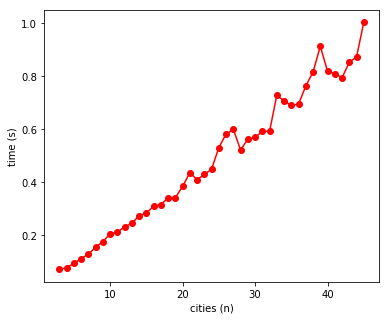

In [8]:
# Determine size of the graph
plt.rcParams["figure.figsize"] = (6,5)
# Plot data
plt.plot(pnts_ant_n, pnts_ant_t, 'ro-')
# Label x and y axis
plt.ylabel('time (s)')
plt.xlabel('cities (n)')
# show graph
plt.show()

The graph is testing for time against cities

# Comparing both graphs:

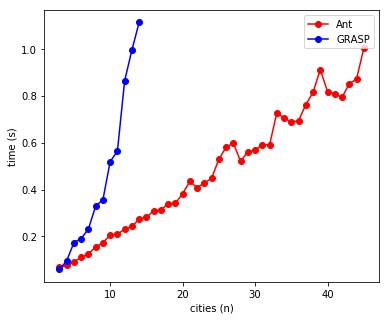

In [9]:
# Determine size of the graph
plt.rcParams["figure.figsize"] = (6,5)
# Plot data from both ant and grasp search
plt.plot(pnts_ant_n, pnts_ant_t, 'ro-', label='Ant')
plt.plot(pnts_grasp_n, pnts_grasp_t, 'ro-', color="blue", label='GRASP')
# Label x and y axis
plt.ylabel('time (s)')
plt.xlabel('cities (n)')
plt.legend()
# show graph
plt.show()

The graph is testing for time against cities for both the Ant Colony and GRASP search

From the graph, the GRASP search grows exponentially as the O notation for this meta-heuristic is 0($2^{n}$). As the input size of the algorithm increases it grows exponentially.

The Ant Colony search grows in quadratic time with this meta-heuristic having a complexity of O($n^{2}$). As the input size of the algorithm increases it grows proportional to the square of the size.

The Ant Colony has the best time complexity as it grows in quadratic time compared to GRASP search having the worst time complexity, growing in polynomial time.

# References

Akhtar, A. (2019) **'Neural and Evolutionary Computing'** [online] avaliable from https://arxiv.org/abs/1908.08007 [12th April 2020]

Anh Tu, P, Tuan Dat, N., Quang Dung, P. (2018) **‘Traveling Salesman Problem with Multiple Drones’** Proceedings of the Ninth International Symposium on Information and Communication Technology [online], 46-53. Available from https://dl.acm.org/doi/abs/10.1145/3287921.3287932 [24 March 2020]

Blum, C. (2011) **'Proceedings of the 13th annual conference companion on Genetic and evolutionary computation'** ACM 978-1-4503-0690-4/11/07 [online] avaliable from https://dl.acm.org/doi/abs/10.1145/2001858.2002122 [13th April 2020]

Dorigo, M. (2007) **'Ant colony optimization'** [online] avaliable from http://www.scholarpedia.org/article/Ant_colony_optimization [13th April 2020]

Hamdi, K. (2014) **‘A mathematical model and a GRASP metaheuristic for a faculty-course assignment problem for a University in Saudi Arabia’** IEEE International Conference on Industrial Engineering and Engineering Management [online], 672-676. Available from https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=7058723 [17 March 2020]

Mersiovsky, T., Thekkottil, A., Hanne, T., Dornberger, R. (2018) **‘Optimal Learning Rate and Neighborhood Radius of Kohonen's Self-Organizing Map for Solving the Travelling Salesman Problem’** Proceedings of the 2nd International Conference on Intelligent Systems, Metaheuristics & Swarm Intelligence [online], 54-59. Available from https://dl.acm.org/doi/abs/10.1145/3206185.3206194 [3 March 2020]

Ribeiro, C., Resende, M., (1999) **‘Algorithm 797: Fortran subroutines for approximate solution of graph planarization problems using GRASP’** ACM Transactions on Mathematical Software [online], 342-352. Available from http://www.optimization-online.org/DB_FILE/2008/07/2039.pdf [2 March 2020]

Talbi, E., (2009) **Metaheuristics: From Design to Implementation** [online], New Jersey: John Wiley & Sons, Inc. available from <https://onlinelibrary.wiley.com/doi/book/10.1002/9780470496916> [5 March 2020]

Wikipedia (2020) **Metaheuristic** [online] available from <https://en.wikipedia.org/wiki/Metaheuristic> [12 March 2020]

Wiktor, M (n.d.) **'Ant Colony Algorithm'** [online] avaliable from https://mathworld.wolfram.com/AntColonyAlgorithm.html [13th April 2020]